# Problem 1

## Problem Statement:

## Clustering:

### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 

## Part 1: Clustering: Define the problem and perform Exploratory Data Analysis

### Problem Definition

### 1.1 Importing Libraries

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### 1.2 Loading the dataset

In [2]:
data = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")
data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

### 1.3 Checking shape

In [3]:
print("There are ", data.shape[0] , "rows and ", data.shape[1] , "columns.")

There are  23066 rows and  19 columns.


### 1.4 Checking datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

There are a total of 19 columns.
13 columns are numerical type columns while 6 columns are object datatype columns.
All columns have 23066 non-null values i.e. there are no missing values.

## 1.5 Explorative Data Analysis

### 1.5.1 Summary Statistics

In [5]:
data.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [6]:
print(data.mean())

Ad - Length              3.851631e+02
Ad- Width                3.378960e+02
Ad Size                  9.667447e+04
Available_Impressions    2.432044e+06
Matched_Queries          1.295099e+06
Impressions              1.241520e+06
Clicks                   1.067852e+04
Spend                    2.706626e+03
Fee                      3.351231e-01
Revenue                  1.924252e+03
CTR                      7.366054e-02
CPM                      7.672045e+00
CPC                      3.510606e-01
dtype: float64


In [7]:
print(data.median())

Ad - Length                 300.00000
Ad- Width                   300.00000
Ad Size                   72000.00000
Available_Impressions    483771.00000
Matched_Queries          258087.50000
Impressions              225290.00000
Clicks                     4425.00000
Spend                      1425.12500
Fee                           0.35000
Revenue                     926.33500
CTR                           0.08255
CPM                           7.66000
CPC                           0.16000
dtype: float64


In [8]:
print(data.mode())

         Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0    2020-10-11-12       Format4        120.0      600.0  72000.0  Inter224   
1     2020-10-11-7           NaN          NaN        NaN      NaN       NaN   
2    2020-10-12-22           NaN          NaN        NaN      NaN       NaN   
3    2020-10-12-23           NaN          NaN        NaN      NaN       NaN   
4    2020-10-14-22           NaN          NaN        NaN      NaN       NaN   
..             ...           ...          ...        ...      ...       ...   
97    2020-9-28-17           NaN          NaN        NaN      NaN       NaN   
98    2020-9-29-15           NaN          NaN        NaN      NaN       NaN   
99    2020-9-30-19           NaN          NaN        NaN      NaN       NaN   
100   2020-9-30-20           NaN          NaN        NaN      NaN       NaN   
101    2020-9-6-10           NaN          NaN        NaN      NaN       NaN   

    Platform Device Type Format  Available_Impressi

### Skewness of data

In [9]:
print(data.skew())

Ad - Length              0.333299
Ad- Width                0.214743
Ad Size                  1.210821
Available_Impressions    3.072738
Matched_Queries          2.982457
Impressions              2.966940
Clicks                   2.940627
Spend                    2.581620
Fee                     -2.301216
Revenue                  2.786801
CTR                      0.751536
CPM                      0.748996
CPC                      1.850014
dtype: float64


### Observations:

* The average value and the median value of Available_Impressions is the highest in the dataset.
* Available impressions has maximum skewness followed by Matched queries and impressions.
* The available impressions has a very high range from 1 to 27592861. 
* The matched queries, impressions and clicks have a very high range.
* The average ad size is 61538.33. 
* The average value of fee payable is very less. 
* The average revenue per ad is 1924.252. The minimum revenue is 0 while the maximum is 21276.
* The clicks range from 1 to 143049.
* The standard deviation is very highest for available impressions, matched queries and impressions.
* The variability is very less for CTR, CPM and CPC as well as fee.

## 1.5.2 Univariate Analysis

### a) Univariate Analysis of Numerical Columns

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.
    

In [10]:
data_num=data.select_dtypes(include=['int64','float64'])
data_num.head()

Ad - Length  Ad- Width  Ad Size  Available_Impressions  Matched_Queries  \
0          300        250    75000                   1806              325   
1          300        250    75000                   1780              285   
2          300        250    75000                   2727              356   
3          300        250    75000                   2430              497   
4          300        250    75000                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [11]:
data_cat=data.select_dtypes(include=['object'])
data_cat.head()

Timestamp InventoryType   Ad Type Platform Device Type   Format
0  2020-9-2-17       Format1  Inter222    Video     Desktop  Display
1  2020-9-2-10       Format1  Inter227      App      Mobile    Video
2  2020-9-1-22       Format1  Inter222    Video     Desktop  Display
3  2020-9-3-20       Format1  Inter228    Video      Mobile    Video
4  2020-9-4-15       Format1  Inter217      Web     Desktop    Video

In [12]:
lstnumericcolumns = list(data_num.columns.values)
len(lstnumericcolumns)

13

In [13]:
def univariateAnalysis_numeric (column, nbins) :
    print ("Description of " +  column)
    print("---------")
    print(data[column].describe().round(2), end=' ')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 5))
          
    ax = axs[0].hist(data[column], bins=nbins, histtype="bar", edgecolor='Black', color='red', lw=2)
    axs[0].set_title("Distribution of " + column)
          
    for container in axs[0].containers:
        axs[0].bar_label (container, label_type="edge", fontsize=10)

    sns.boxplot (y=data[column], orient= 'v', ax=axs[1]) 
    axs[1].set_title("Boxplot of " + column)
    
    plt.tight_layout() #neat output
    plt.show()

Description of Ad - Length
---------
count    23066.00
mean       385.16
std        233.65
min        120.00
25%        120.00
50%        300.00
75%        720.00
max        728.00
Name: Ad - Length, dtype: float64 

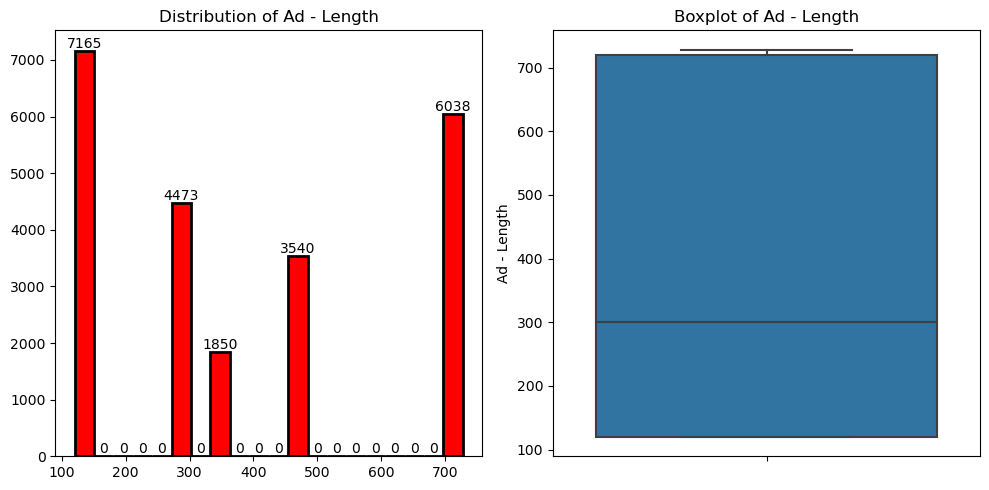

Description of Ad- Width
---------
count    23066.00
mean       337.90
std        203.09
min         70.00
25%        250.00
50%        300.00
75%        600.00
max        600.00
Name: Ad- Width, dtype: float64 

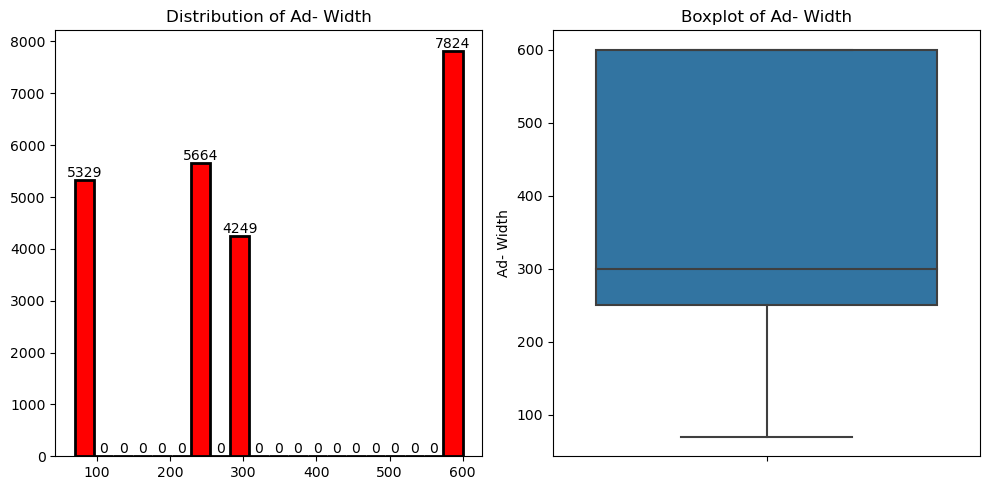

Description of Ad Size
---------
count     23066.00
mean      96674.47
std       61538.33
min       33600.00
25%       72000.00
50%       72000.00
75%       84000.00
max      216000.00
Name: Ad Size, dtype: float64 

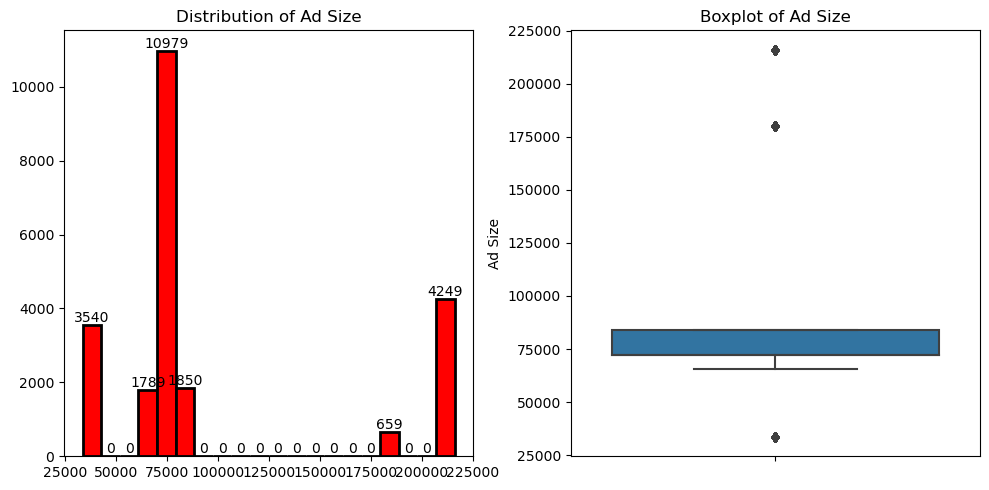

Description of Available_Impressions
---------
count       23066.00
mean      2432043.67
std       4742887.76
min             1.00
25%         33672.25
50%        483771.00
75%       2527711.75
max      27592861.00
Name: Available_Impressions, dtype: float64 

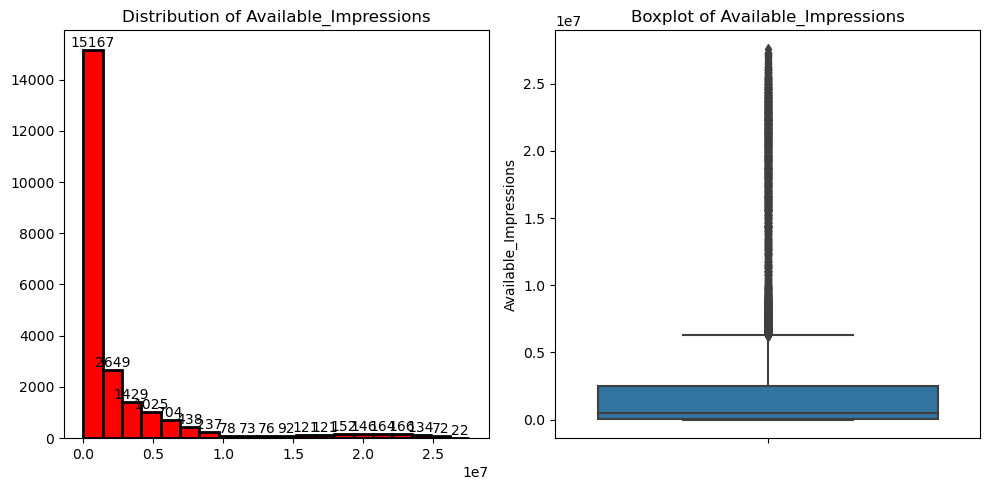

Description of Matched_Queries
---------
count       23066.00
mean      1295099.14
std       2512969.86
min             1.00
25%         18282.50
50%        258087.50
75%       1180700.00
max      14702025.00
Name: Matched_Queries, dtype: float64 

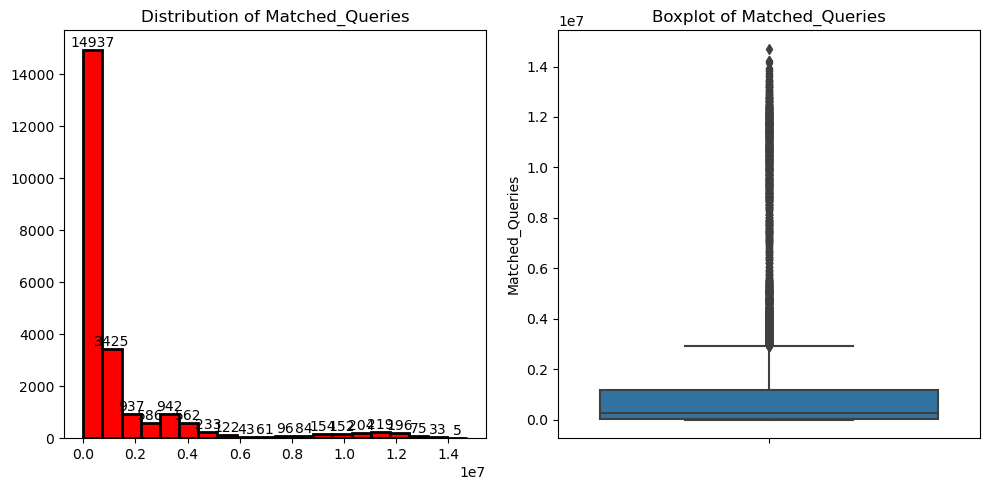

Description of Impressions
---------
count       23066.00
mean      1241519.52
std       2429399.96
min             1.00
25%          7990.50
50%        225290.00
75%       1112428.50
max      14194774.00
Name: Impressions, dtype: float64 

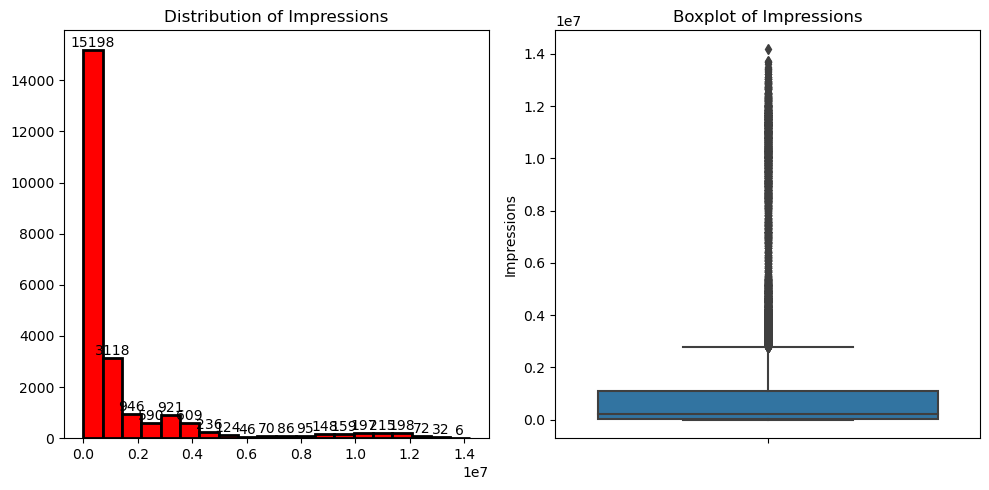

Description of Clicks
---------
count     23066.00
mean      10678.52
std       17353.41
min           1.00
25%         710.00
50%        4425.00
75%       12793.75
max      143049.00
Name: Clicks, dtype: float64 

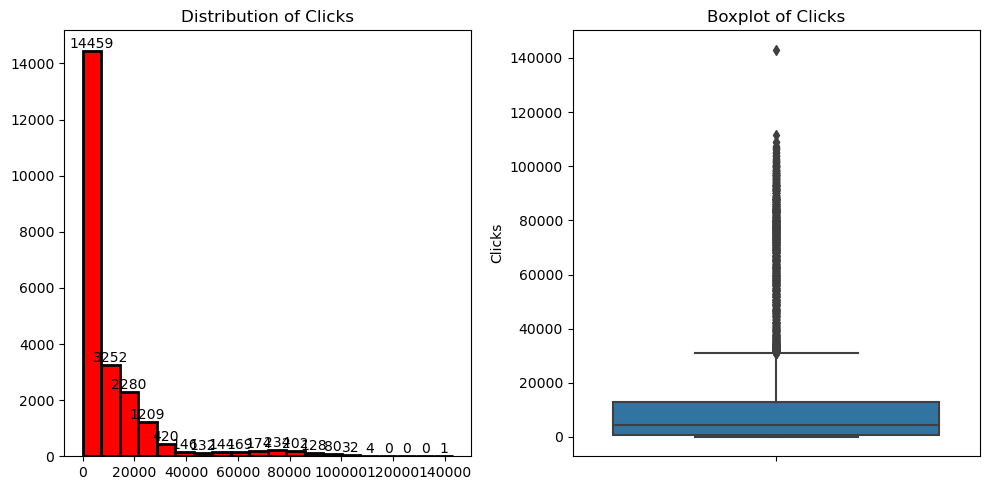

Description of Spend
---------
count    23066.00
mean      2706.63
std       4067.93
min          0.00
25%         85.18
50%       1425.12
75%       3121.40
max      26931.87
Name: Spend, dtype: float64 

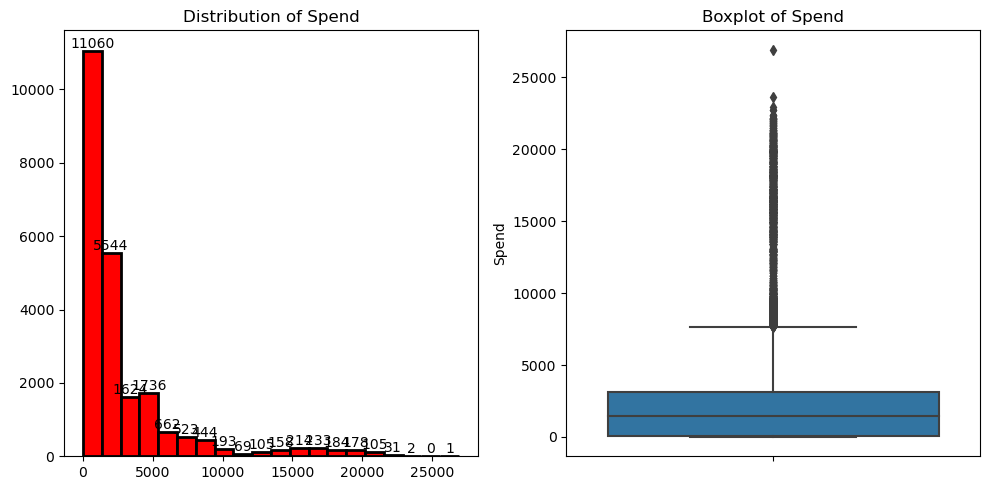

Description of Fee
---------
count    23066.00
mean         0.34
std          0.03
min          0.21
25%          0.33
50%          0.35
75%          0.35
max          0.35
Name: Fee, dtype: float64 

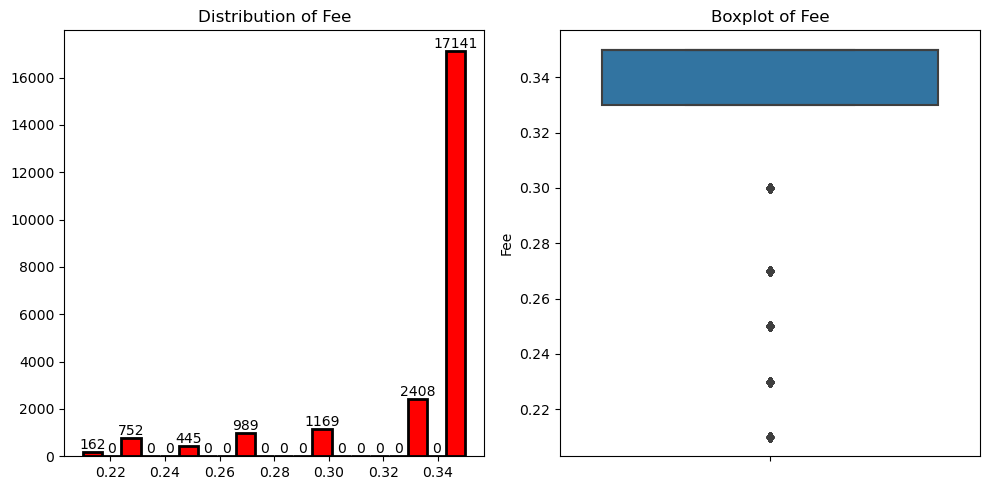

Description of Revenue
---------
count    23066.00
mean      1924.25
std       3105.24
min          0.00
25%         55.37
50%        926.34
75%       2091.34
max      21276.18
Name: Revenue, dtype: float64 

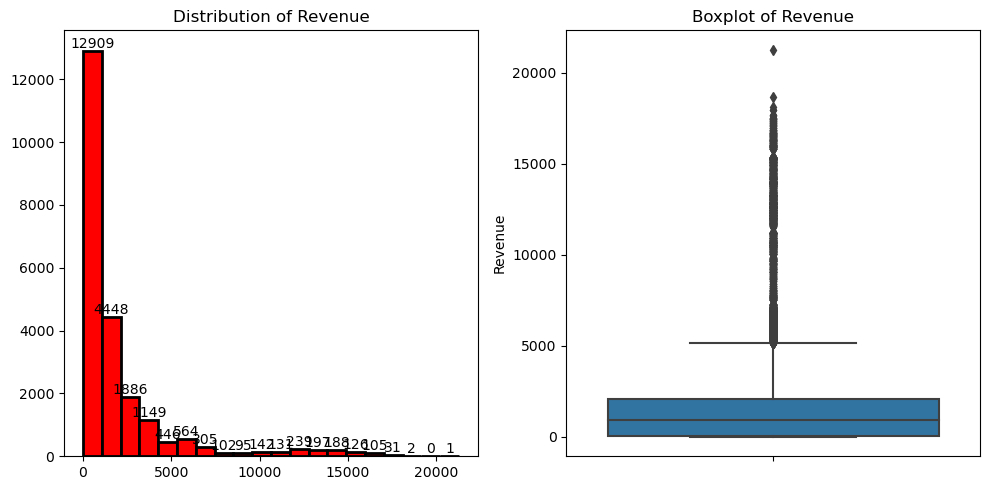

Description of CTR
---------
count    18330.00
mean         0.07
std          0.08
min          0.00
25%          0.00
50%          0.08
75%          0.13
max          1.00
Name: CTR, dtype: float64 

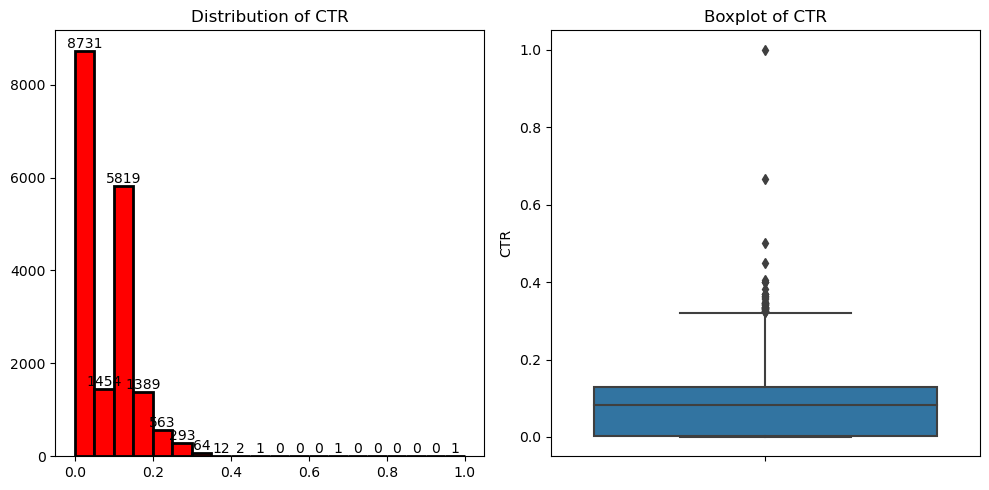

Description of CPM
---------
count    18330.00
mean         7.67
std          6.48
min          0.00
25%          1.71
50%          7.66
75%         12.51
max         81.56
Name: CPM, dtype: float64 

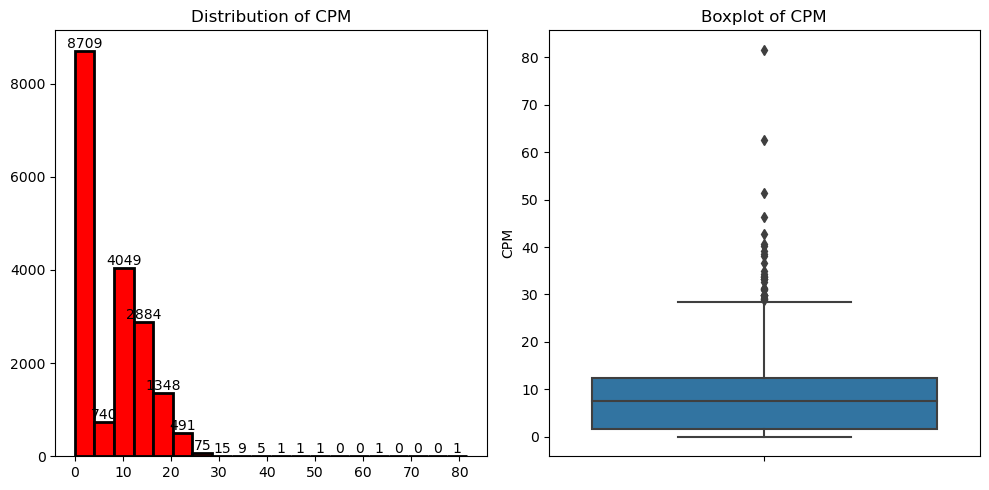

Description of CPC
---------
count    18330.00
mean         0.35
std          0.34
min          0.00
25%          0.09
50%          0.16
75%          0.57
max          7.26
Name: CPC, dtype: float64 

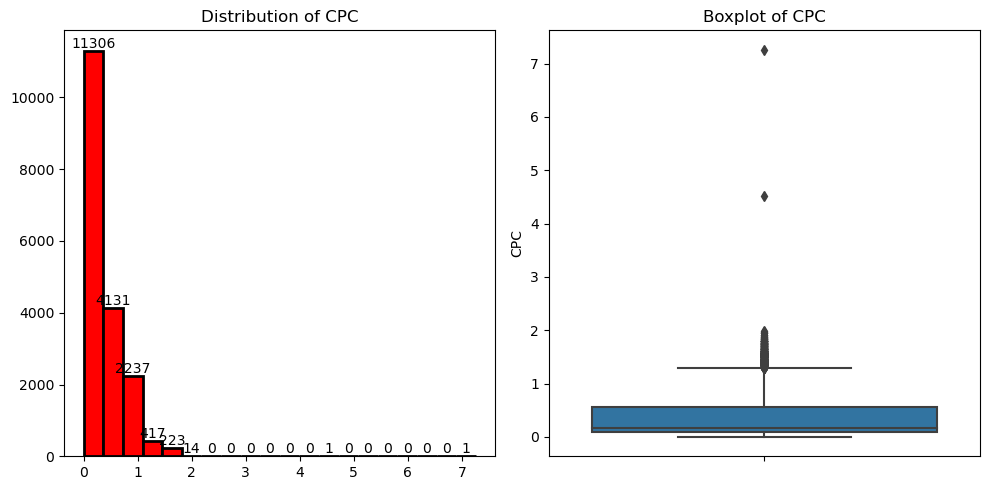

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

### Observations

* There are 13 numerical fields in the dataset.
* Ad-length and Ad-width do not seem to have any outliers, but their product which makes the Ad-size has outliers.
* Available impressions seem to be highly right skewed with mean greater than the median.
* There are a huge number of outliers in Available impressions as well as matched queries fields.
* The impressions and clicks fields are also right-skewed with large number of outliers.
* Spend and Revenue fields are also right-skewed with many outliers.
* Fee field is the only field which is left-skewed.
* CTR, CPM and CPC are the three fields which exhibit right-skewness with many outliers.
* The outliers need to be treated.

### b) Univariate Analysis for Categorical columns

In [15]:
# Univariate Analysis for categorical columns

def univariateAnalysis_categorical(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(include='object'),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data[column], x=data_cat[column],order=data_cat[column].value_counts().index);
    plt.bar_label(a.containers[0]);
    plt.show()

In [16]:
lstcatcolumns = list(data_cat.columns.values)
len(lstcatcolumns)

6

Description of Timestamp
----------------------------------------------------------------------------
count             23066
unique             2018
top       2020-11-13-22
freq                 13
Name: Timestamp, dtype: object Distribution of Timestamp
----------------------------------------------------------------------------


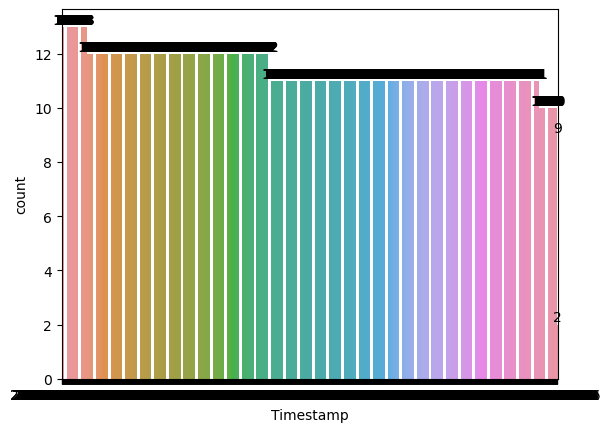

Description of InventoryType
----------------------------------------------------------------------------
count       23066
unique          7
top       Format4
freq         7165
Name: InventoryType, dtype: object Distribution of InventoryType
----------------------------------------------------------------------------


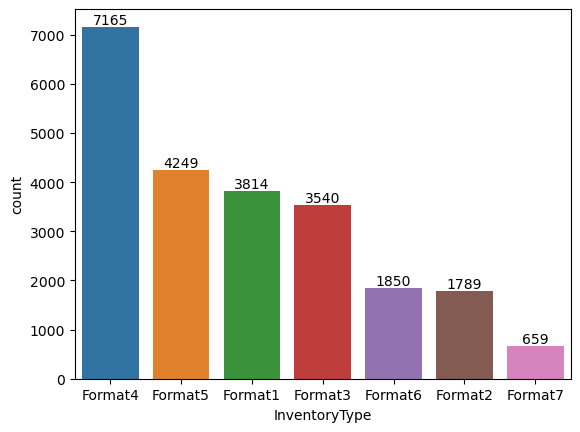

Description of Ad Type
----------------------------------------------------------------------------
count        23066
unique          14
top       Inter224
freq          1658
Name: Ad Type, dtype: object Distribution of Ad Type
----------------------------------------------------------------------------


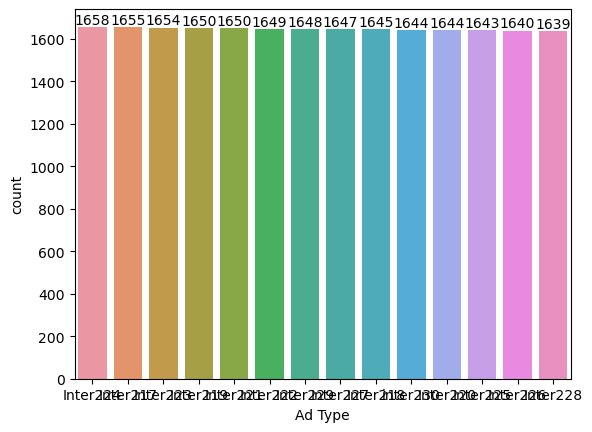

Description of Platform
----------------------------------------------------------------------------
count     23066
unique        3
top       Video
freq       9873
Name: Platform, dtype: object Distribution of Platform
----------------------------------------------------------------------------


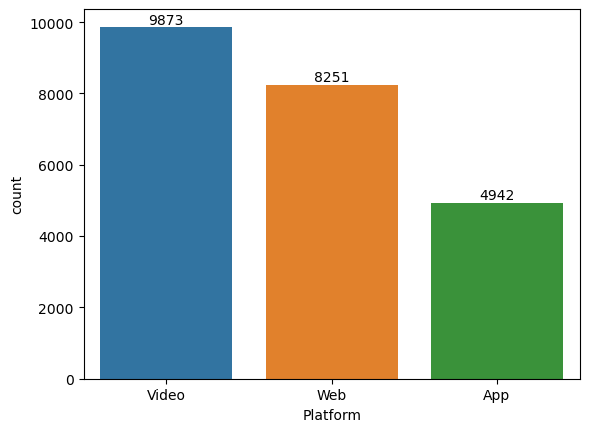

Description of Device Type
----------------------------------------------------------------------------
count      23066
unique         2
top       Mobile
freq       14806
Name: Device Type, dtype: object Distribution of Device Type
----------------------------------------------------------------------------


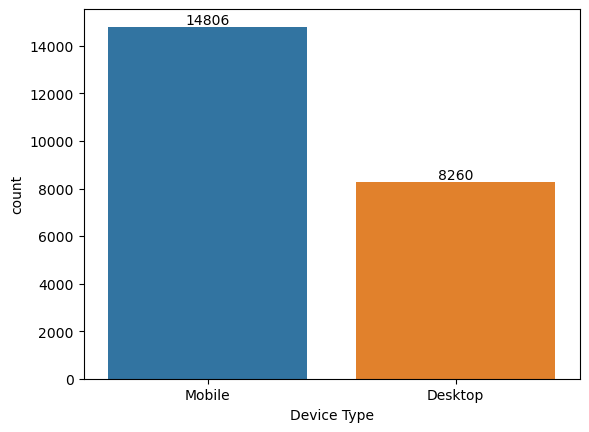

Description of Format
----------------------------------------------------------------------------
count     23066
unique        2
top       Video
freq      11552
Name: Format, dtype: object Distribution of Format
----------------------------------------------------------------------------


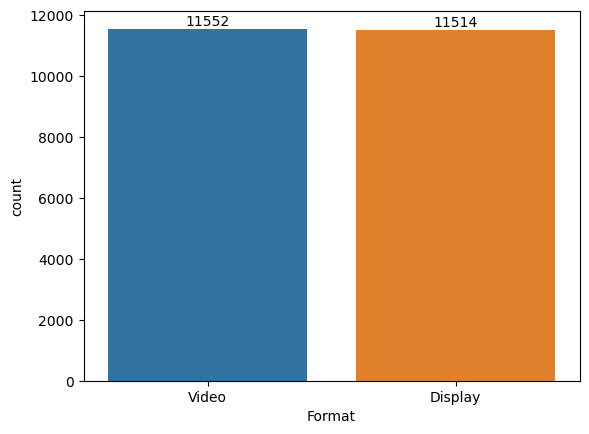

In [17]:
for i in lstcatcolumns:
    univariateAnalysis_categorical(i);

### Observations:

* Format 4 has maximum count of inventory type.
* Ad types are almost the same for all types.
* Video type has a much bigger count (9873) as compared to Web(8251) and App(4942).
* Mobile type is used much more than desktop device type.
* Video and Display formats are almost the same count.

## 1.5.3 BIVARIATE ANALYSIS - Correlation between variables

In [18]:
data_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

<Figure size 2000x1200 with 0 Axes>

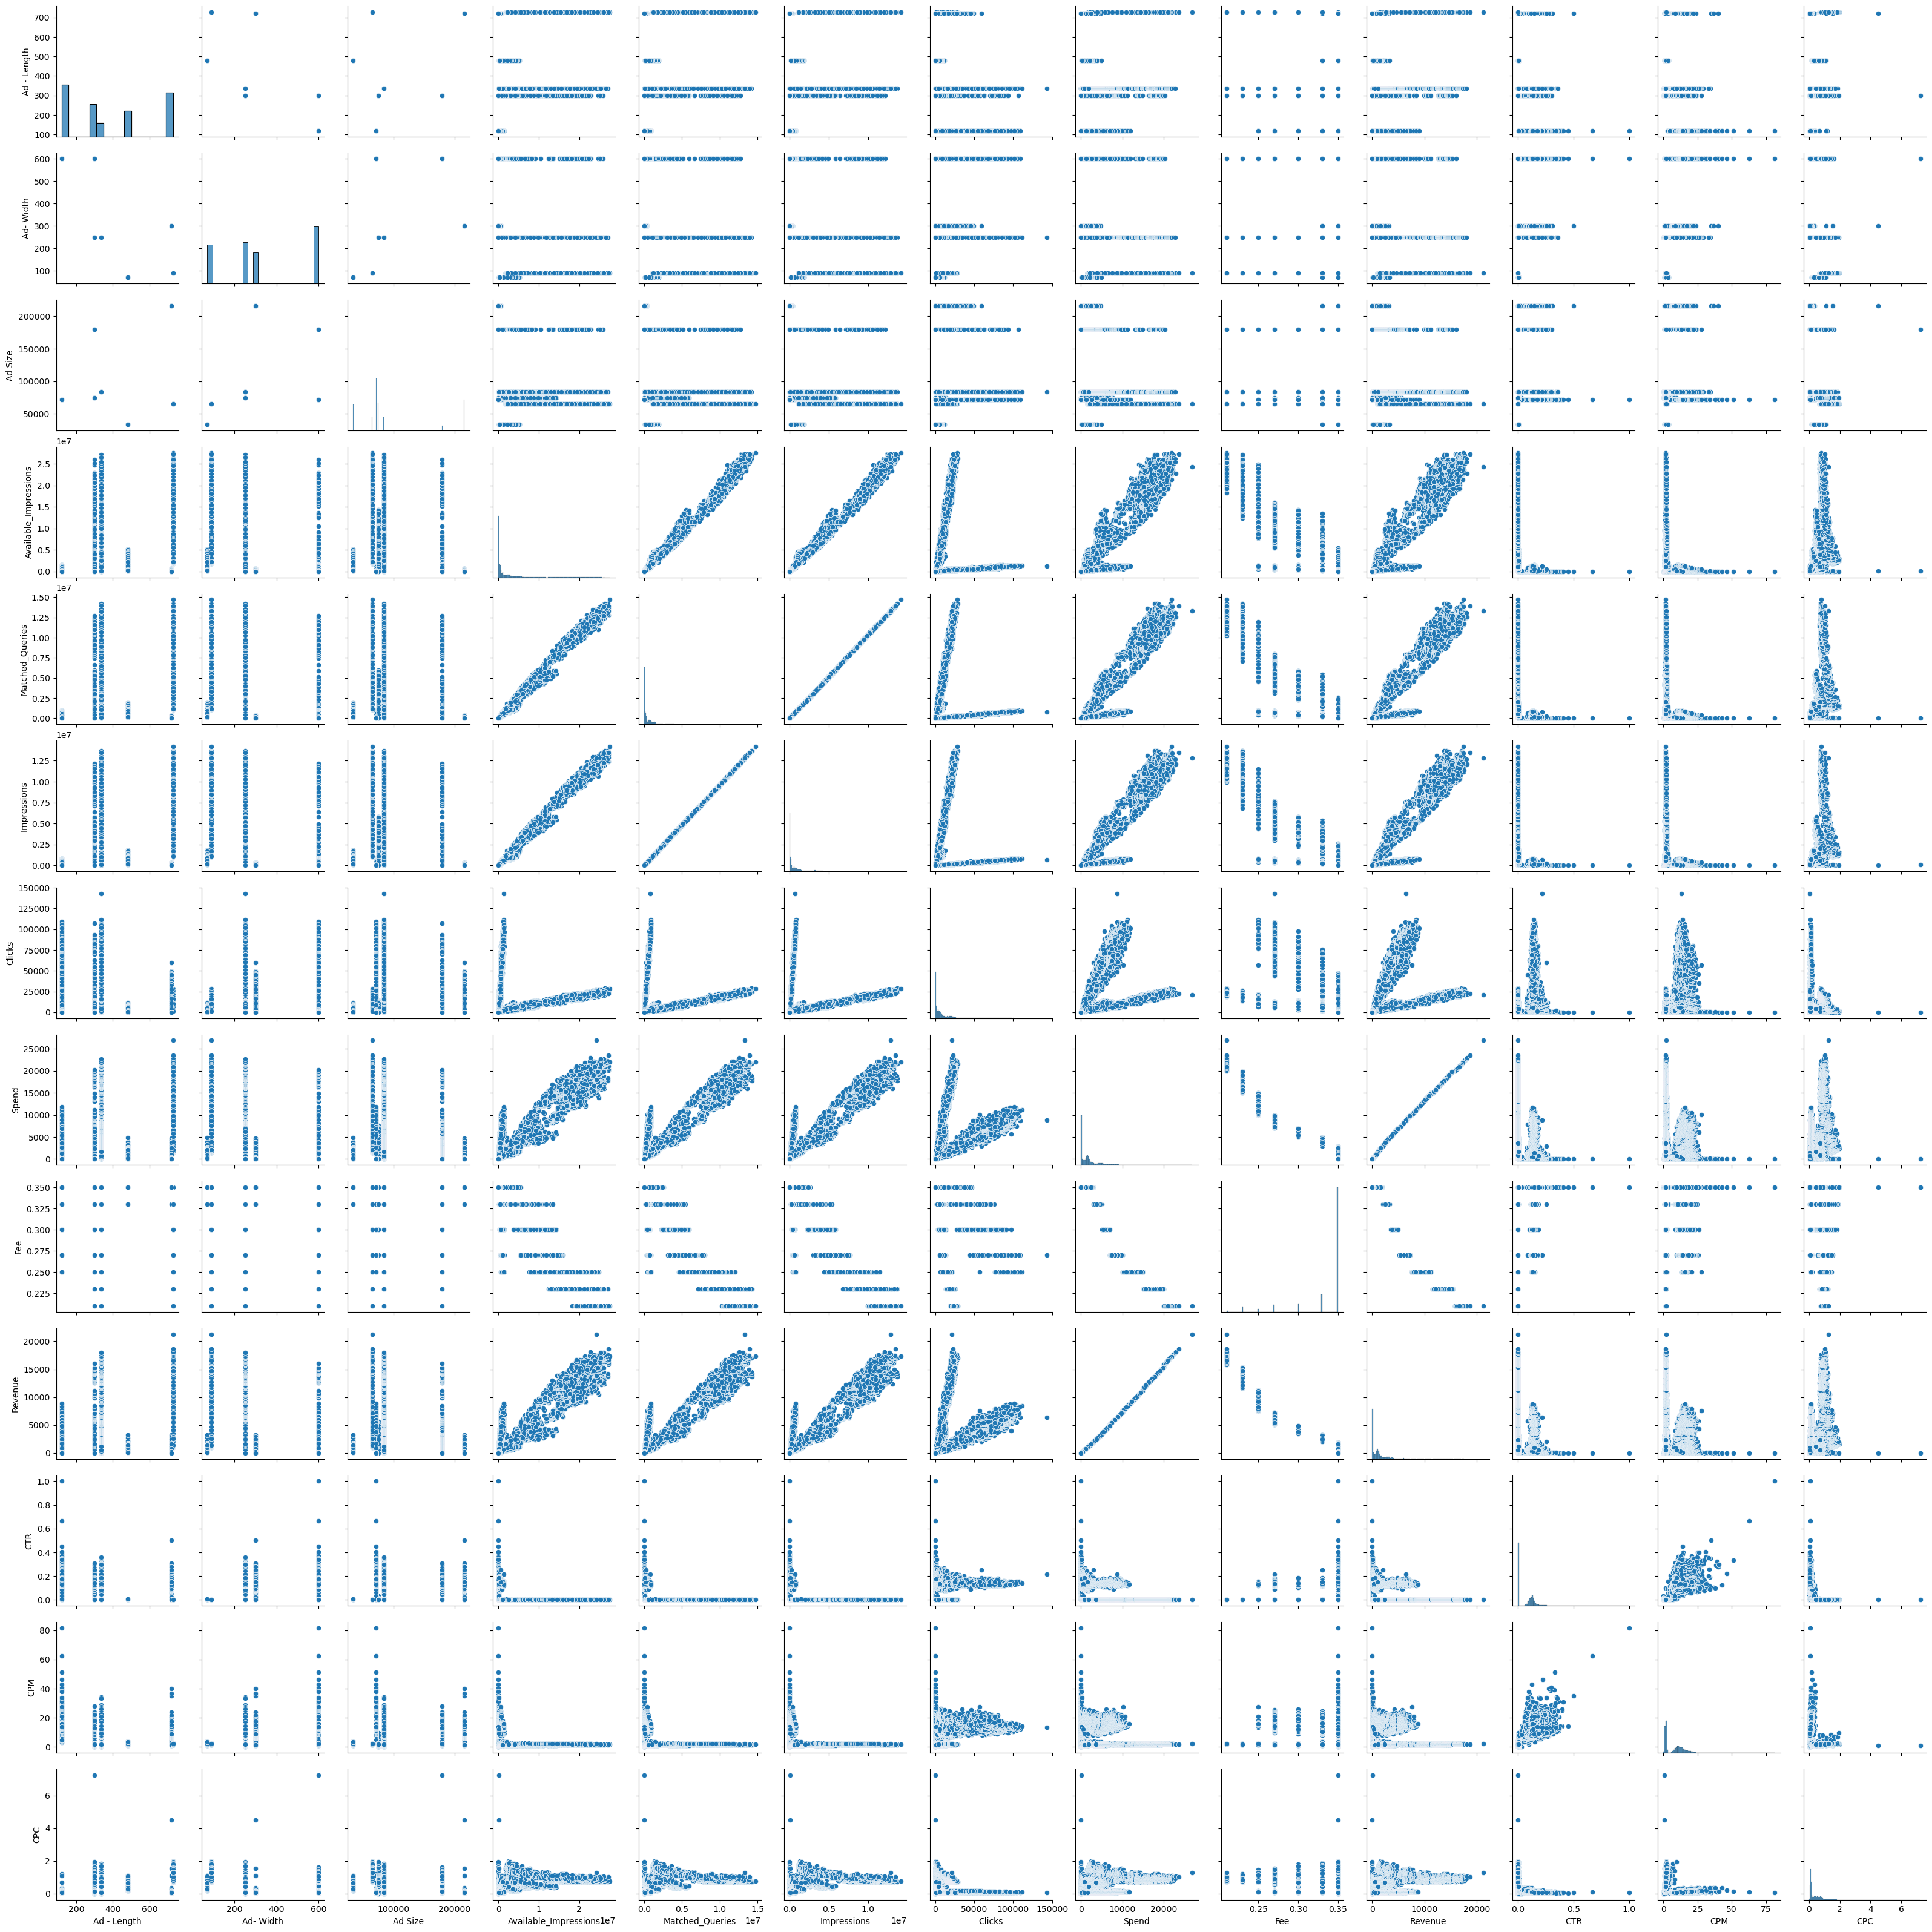

In [19]:
# Numeric vs Numeric

plt.figure(figsize=(20,12))
sns.pairplot(data=data_num);
corner=True

## 1.5.4 PLOTTING THE CORRELATION BETWEEN VARIABLES

<Axes: >

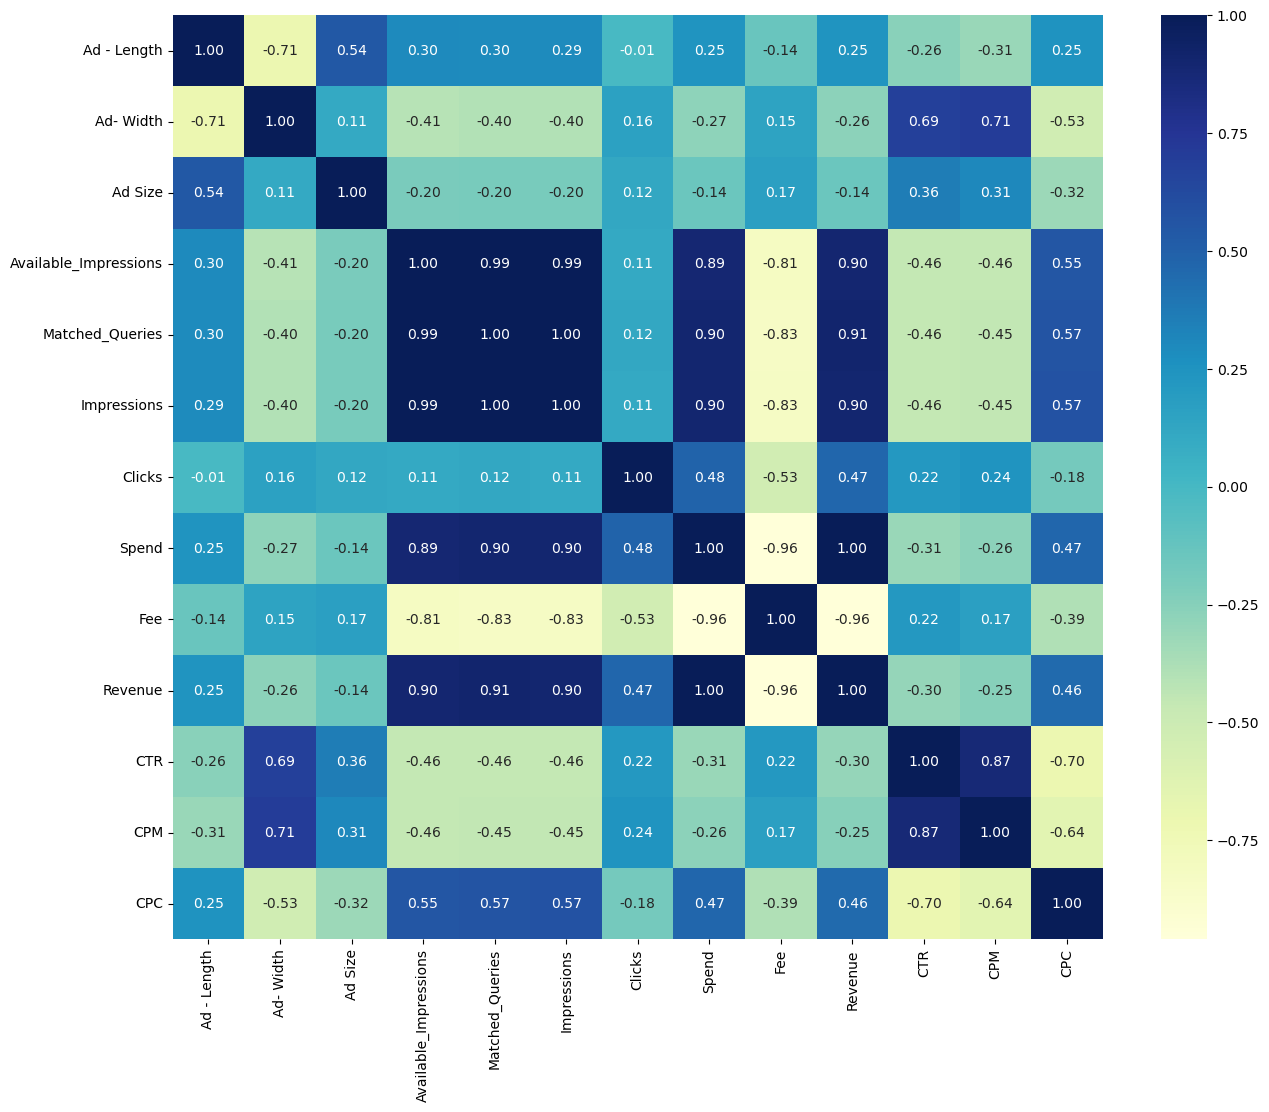

In [20]:
plt.figure(figsize = (15,12))
sns.heatmap(data_num.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

### Observations:

* There is a very high correlation between:
    Available impressions and Matched queries
    Impressions and Matched queries
    Impressions and Available impressions
    Revenue and Spend.
    
* There is good correlation between:
    Matched Queries and Spend
    Impressions and Spend
    Matched queries and Revenue
    Impressions and Revenue
    Available Impressions and Revenue
    Available Impressions and Spend

* There is negative correlation between:
    CPC and CTR
    Fee and other fields like Revenue, Spend, Impressions, Matched queries

## 2.1 DATA PREPROCESSING

### 2.1.1 Checking for duplicate rows

In [21]:
#Check for presence of duplicate rows
dup = data.duplicated()
print("No. of duplicate rows is", dup.sum())



No. of duplicate rows is 0


### 2.1.2 Checking for missing values

In [22]:
data.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

There are missing values in 4736 rows of CTR, CPM and CPC columns. We need to treat the missing values before proceeding further.


In [23]:
data['CTR']=data['CTR'].fillna(data['Clicks']/data['Impressions']*100)    

In [24]:
data['CPM']=data['CPM'].fillna(data['Spend']*data['Impressions']*1000)


In [25]:
data['CPC']=data['CPC'].fillna(data['Spend']*data['Clicks'])

In [26]:
data.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [27]:
data.head(2)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0

### 2.1.3 Dropping object type columns

In [28]:
# Dropping Timestamp, Inventory Type, Ad Type, Platform, Device Type, Format, Ad-Length and Ad-width columns as they are not useful for Clustering
df=data.drop(['Timestamp','InventoryType','Ad Type', 'Platform', 'Device Type', 'Format', 'Ad - Length', 'Ad- Width'], axis=1)
df.head(5)

Ad Size  Available_Impressions  Matched_Queries  Impressions  Clicks  \
0    75000                   1806              325          323       1   
1    75000                   1780              285          285       1   
2    75000                   2727              356          355       1   
3    75000                   2430              497          495       1   
4    75000                   1218              242          242       1   

   Spend   Fee  Revenue     CTR  CPM  CPC  
0    0.0  0.35      0.0  0.0031  0.0  0.0  
1    0.0  0.35      0.0  0.0035  0.0  0.0  
2    0.0  0.35      0.0  0.0028  0.0  0.0  
3    0.0  0.35      0.0  0.0020  0.0  0.0  
4    0.0  0.35      0.0  0.0041  0.0  0.0

### 2.1.4 Checking for Outliers

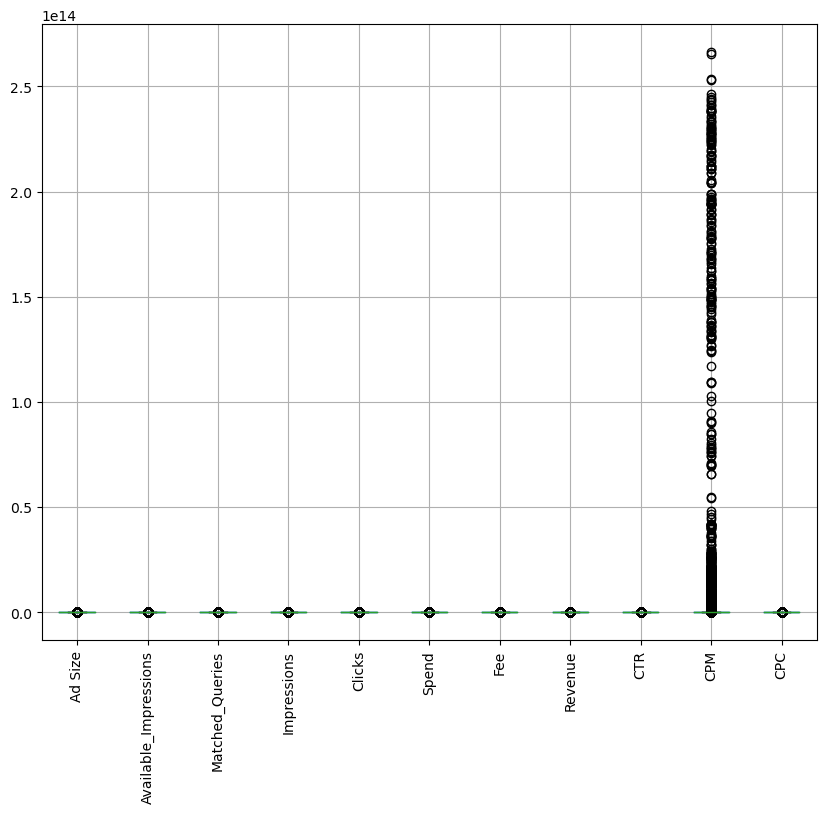

In [29]:
df.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

### Treatment of outliers

In [30]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
column_list = df.columns

def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   


In [31]:
#Cap & floor the values beyond the outlier boundaries
for i in column_list:
    LL, UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

### Visualization after treatment of outliers

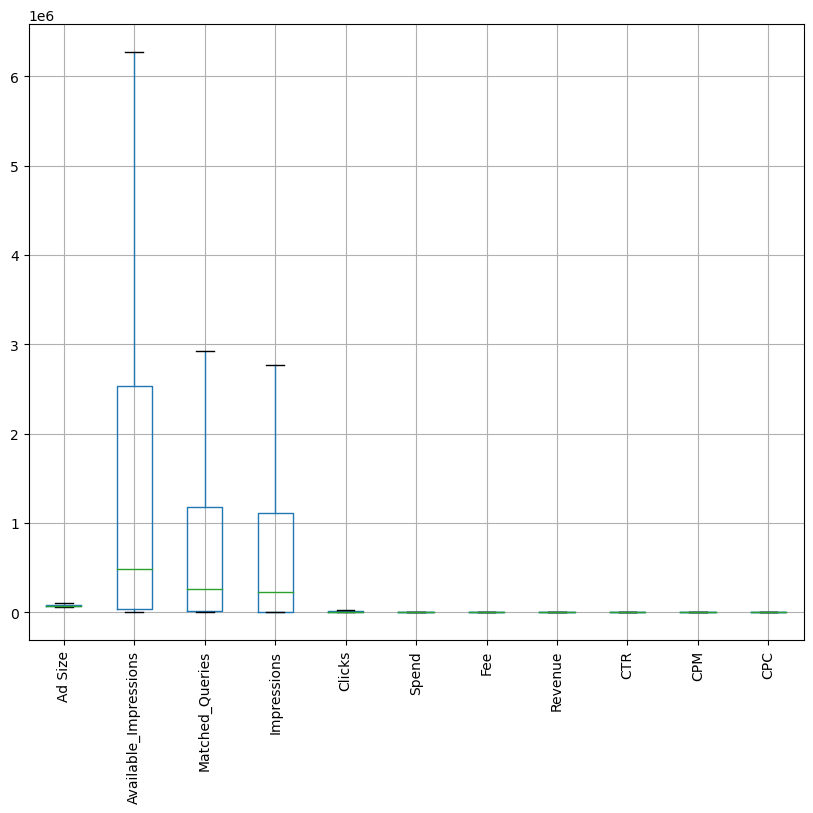

In [32]:
#Check for presence of outliers in each feature
df.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()


### Observations:

We see that all outliers have been removed and treated. We can proceed with the scaling of data.

### 2.1.5 Scaling and Standardizing the data

In [33]:
#Scale the data
from scipy.stats import zscore
df_scaled = df.apply(zscore)

In [34]:
df_scaled

Ad Size  Available_Impressions  Matched_Queries  Impressions  \
0     -0.102518              -0.755333        -0.778949    -0.768478   
1     -0.102518              -0.755345        -0.778988    -0.768516   
2     -0.102518              -0.754900        -0.778919    -0.768445   
3     -0.102518              -0.755040        -0.778781    -0.768302   
4     -0.102518              -0.755610        -0.779030    -0.768560   
...         ...                    ...              ...          ...   
23061  1.652896              -0.756182        -0.779265    -0.768806   
23062  1.652896              -0.756181        -0.779264    -0.768805   
23063  1.652896              -0.756182        -0.779265    -0.768806   
23064 -0.297564              -0.756179        -0.779265    -0.768806   
23065  1.652896              -0.756182        -0.779264    -0.768805   

         Clicks     Spend       Fee   Revenue       CTR       CPM       CPC  
0     -0.867488 -0.893170  0.535724 -0.880093 -0.891201 -0.958326 -0.924681  
1     -0.867488 -0.893170  0.535724 -0.880093 -0.888615 -0.958326 -0.924681  
2     -0.867488 -0.893170  0.535724 -0.880093 -0.893142 -0.958326 -0.924681  
3     -0.867488 -0.893170  0.535724 -0.880093 -0.898315 -0.958326 -0.924681  
4     -0.867488 -0.893170  0.535724 -0.880093 -0.884734 -0.958326 -0.924681  
...         ...       ...       ...       ...       ...       ...       ...  
23061 -0.867488 -0.893141  0.535724 -0.880066  2.027108  1.838610 -0.822706  
23062 -0.867488 -0.893154  0.535724 -0.880078  2.027108  1.838610 -0.866409  
23063 -0.867488 -0.893150  0.535724 -0.880074  2.027108  1.838610 -0.851841  
23064 -0.867488 -0.893141  0.535724 -0.880066  2.027108  1.838610 -0.822706  
23065 -0.867488 -0.893133  0.535724 -0.880058  2.027108  1.838610 -0.793570  

[23066 rows x 11 columns]

In [35]:
#Creating copy of the data to store labels from each algorithm
df_scaled_copy = df_scaled.copy(deep=True)

### Inferences:
Scaling is necessary because it is a distance algorithm. In this problem, each variable has a different range. One variable might dominate another variable because it has a larger range than the other. To avoid this, we need to preprocess and scale your data so that each variable has a comparable impact on the clustering outcome.


## 3. HIERARCHICAL CLUSTERING

### 3.1 Constructing a dendrogram using Ward linkage and Euclidean distance

In [36]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
wardlink = linkage(df_scaled, method='ward')

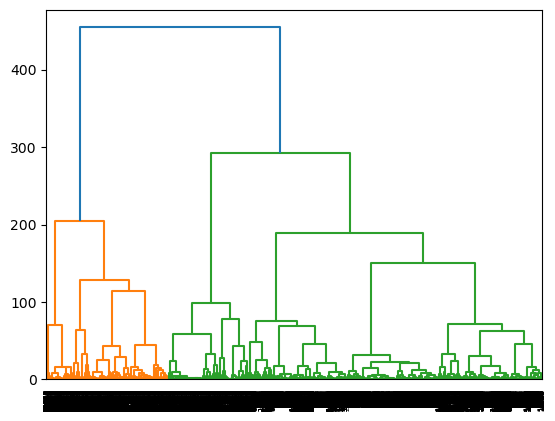

In [38]:
dend = dendrogram(wardlink) 

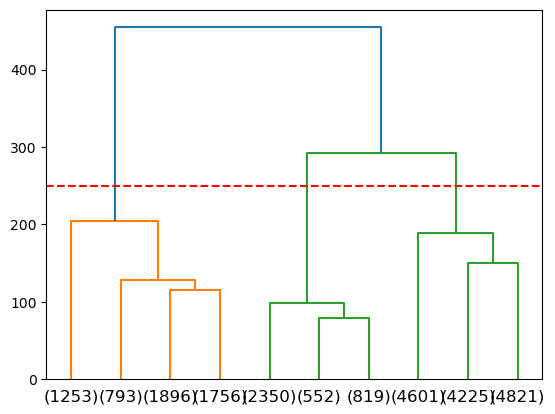

In [39]:
dend = dendrogram(wardlink, truncate_mode = 'lastp', p=10)
plt.axhline(250, color='red', linestyle='--')

### Inferences:

•	Dendrogram helps in visualizing hierarchical clustering and assist in choosing optimum number of clusters. 23066 records are     merged based on Euclidean distance and formed into one cluster.
•	For better visualization, dendrogram is plot with last 10 mergers. X axis represents sample index and Y axis represent the       minimum distance at which the merge happened. 
•	Drawing a horizontal line at the distance of 250 leads to the result of forming 3 clusters. 
•	It is inferred from dendrogram that Optimum number of clusters is 3. 



### 3.2 Forming clusters

In [40]:
from scipy.cluster.hierarchy import fcluster

In [41]:
# Method 1 for forming clusters using maxclust
clusters=fcluster(wardlink, 3, criterion = 'maxclust')
clusters

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [42]:
# Method 2 for forming clusters using distance
clusters_D=fcluster(wardlink, 250, criterion = 'distance')
clusters_D 

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [43]:
data['clusters'] = clusters
data.to_csv('hc.csv')

### Inferences:

The linkage Method used for forming clusters is Ward’s linkage and the distance is calculated using Euclidean distance and thereby at the distance of 250, the clusters obtained are 3 clusters. 

The optimum number of clusters is 3.

In [44]:
data.clusters.value_counts().sort_index()

1     5698
2     3721
3    13647
Name: clusters, dtype: int64

In [45]:
data['clusters']=clusters
data

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue       CTR    CPM   CPC  \
0              323       1   0.00  0.35   0.0000    0.0031    0.0  0.00   
1              285       1   0.00  0.35   0.0000    0.0035    0.0  0.00   
2              355       1   0.00  0.35   0.0000    0.0028    0.0  0.00   
3              495       1   0.00  0.35   0.0000    0.0020    0.0  0.00   
4              242       1   0.00  0.35   0.0000    0.0041    0.0  0.00   
...            ...     ...    ...   ...      ...       ...    ...   ...   
23061            1       1   0.07  0.35   0.0455  100.0000   70.0  0.07   
23062            2       1   0.04  0.35   0.0260   50.0000   80.0  0.04   
23063            1       1   0.05  0.35   0.0325  100.0000   50.0  0.05   
23064            1       1   0.07  0.35   0.0455  100.0000   70.0  0.07   
23065            2       1   0.09  0.35   0.0585   50.0000  180.0  0.09   

       clusters  
0             3  
1             3  
2             3  
3             3  
4             3  
...         ...  
23061         2  
23062         2  
23063         2  
23064         2  
23065         2  

[23066 rows x 20 columns]

Inference: 

The clusters are obtained and stored as a column in the original dataset. So, each record belongs to either one of the clusters. Clustering is performed in such a way there is homogeneity within cluster and heterogeneity between clusters.

In [46]:
data_cluster = data.groupby(['clusters']).mean()
cluster_freq = data['clusters'].value_counts().sort_index()
data_cluster['Frequency'] = cluster_freq.values
data_cluster

Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
clusters                                                                  
1          386.544753  282.883468   75081.986662           7.790480e+06   
2          377.334050  400.029562  111435.044343           4.133084e+05   
3          386.720891  343.923939  101665.297868           7.451779e+05   

          Matched_Queries   Impressions        Clicks        Spend       Fee  \
clusters                                                                       
1            4.251715e+06  4.100905e+06  24001.240435  8035.304791  0.291237   
2            1.928192e+05  1.782458e+05   4612.842247   645.046165  0.349613   
3            3.611786e+05  3.375600e+05   6769.785374  1043.866393  0.349496   

              Revenue        CTR           CPM           CPC  Frequency  
clusters                                                                 
1         5885.022632   0.532299  7.550436e+12  3.432652e+07       5698  
2          420.734507  15.042539  2.942026e+11  9.197240e+06       3721  
3          680.471327   0.095853  8.695026e+00  2.608046e-01      13647

### Inferences:

* The clusters are grouped according to the mean and the frequency of each cluster is obtained.
* Cluster 1 is the High Spend group with a frequency of 5698.
* Cluster 2 are the Lowest Spend group with a frequency of 3721.
* Cluster 3 are the Average Spend group with a frequency of 13647.

## 4. Clustering: K-means Clustering

K-Mean Clustering constructs “K” Partition in data. The major requirement for K-means clustering is, the number are clusters should be pre-determined. To determine the number of clusters, WSS (within sum of square) is plotted and the elbow cut denotes the optimum number of clusters.

### 4.1 Applying KMeans clustering to the dataset

### a) Creating 2 clusters with k=2

In [47]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)

In [48]:
# Fit K means on the scaled_df
k_means.fit(df_scaled)

KMeans(n_clusters=2)

In [49]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1])

### b) Finding WSS for clusters 1 to 10

In [50]:
# To plot a WSS plot

wss = []
for i in range (1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [51]:
for i in range(1,11):
    print("The WSS value for ", i, "cluster is", wss[i-1])

The WSS value for  1 cluster is 253725.99999999988
The WSS value for  2 cluster is 149080.89044531103
The WSS value for  3 cluster is 105411.42524375158
The WSS value for  4 cluster is 82828.27967059702
The WSS value for  5 cluster is 64258.15408763298
The WSS value for  6 cluster is 52740.53116301942
The WSS value for  7 cluster is 45767.02826459931
The WSS value for  8 cluster is 41328.60617899531
The WSS value for  9 cluster is 36219.571826324085
The WSS value for  10 cluster is 31861.63245000897


Inferences:

The clusters are merged when their within sum of square value is minimum. The WSS Inertia value for clusters is obtained. The point beyond which the WSS value drop is not significant, that point is taken as optimum point for determining number of clusters.


### 4.2 Plotting the Elbow Curve

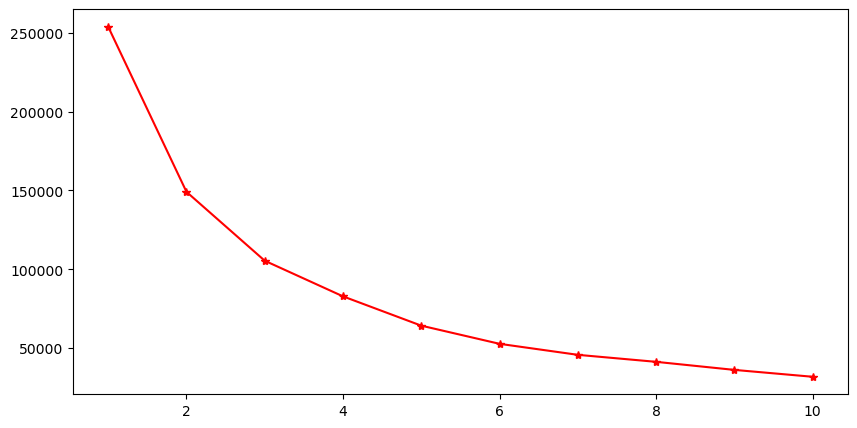

In [52]:
plt.figure(figsize =(10,5))
plt.plot(range(1,11), wss, marker='*',color='red')

Inferences:

We can see from the plot that there is a consistent dip from 3 to 5 and there doesn't seem to be a clear 'elbow' here. We may chose any from 23 to 5 as our number of clusters.
So, let's look at another method. Let's create a plot with Silhouette scores to see how it varies with k.

### 4.3 SILHOUETTE SCORE

### Calculatinng the silhouette scores for 2 clusters to 10 clusters

In [53]:
# Silhouette Analysis
#from sklearn.metrics import silhouette_score
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters,init = 'k-means++', random_state=1)
    kmeans.fit(df_scaled)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = round(silhouette_score(df_scaled,cluster_labels),4)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4523
For n_clusters=3, the silhouette score is 0.442
For n_clusters=4, the silhouette score is 0.47
For n_clusters=5, the silhouette score is 0.4243
For n_clusters=6, the silhouette score is 0.4483
For n_clusters=7, the silhouette score is 0.4455
For n_clusters=8, the silhouette score is 0.463
For n_clusters=9, the silhouette score is 0.4714
For n_clusters=10, the silhouette score is 0.464


Inferences:

We observe that after number of clusters = 4, there is a sharp decline in the silhouette score. Hence, the optimum number of clusters should be 4.

### 4.4 Elbow Plot for Silhouette Scores

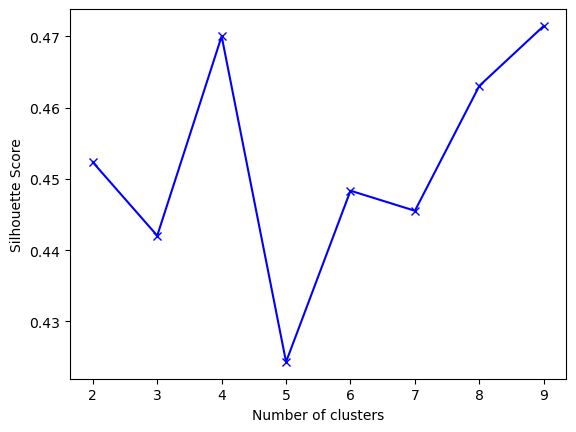

In [54]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_scaled)
    labels = kmeans.predict(df_scaled)
    sc[k] = silhouette_score(df_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

Inferences:

The silhouette score plot clearly shows that the silhouette score is the highest at 4 clusters.
It can be observed that the maximum Silhouette Score is obtained for K=4.

### Hence, the optimum number of clusters are 4.

### 4.5 Cluster Profiling

### KMeans with k=4

In [55]:

data.drop('clusters', axis=1, inplace=True)

In [56]:
data.head(2)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0

In [57]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df_scaled)
labels = k_means.labels_
data["Clus_kmeans"] = labels
data.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  Clus_kmeans  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0            1  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0            1  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0            1  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0            1  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0            1

In [58]:
data.Clus_kmeans.value_counts().sort_index()

0     4208
1    13380
2     1567
3     3911
Name: Clus_kmeans, dtype: int64

In [59]:
clust_profile=data.groupby('Clus_kmeans').mean()
clust_profile['freq']=data.Clus_kmeans.value_counts().sort_index()
clust_profile

Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Clus_kmeans                                                                  
0             460.598859  200.903042   75238.288973           1.013543e+07   
1             388.857399  339.788490  101393.641256           7.556042e+05   
2             167.509892  558.774729   81802.169751           8.034435e+05   
3             378.566096  390.319611  109552.452058           5.314839e+05   

             Matched_Queries   Impressions        Clicks        Spend  \
Clus_kmeans                                                             
0               5.488822e+06  5.315528e+06  11000.566302  8442.988771   
1               3.647695e+05  3.418250e+05   6025.063154   982.914146   
2               5.629984e+05  4.751646e+05  64985.560306  6910.902642   
3               2.590025e+05  2.431462e+05   4493.125543   747.163304   

                  Fee      Revenue        CTR           CPM           CPC  \
Clus_kmeans                                                                 
0            0.292115  6215.332228   0.032543  9.827276e+12  1.915074e+07   
1            0.349876   639.283118   0.094552  8.527395e+00  2.658430e-01   
2            0.289075  4957.978912   1.901289  5.451213e+11  7.294314e+07   
3            0.349376   487.835637  14.301473  4.882974e+11  8.930513e+06   

              freq  
Clus_kmeans         
0             4208  
1            13380  
2             1567  
3             3911

In [60]:
clust_profile=data.groupby('Clus_kmeans').mean()
clust_profile['freq']=data.Clus_kmeans.value_counts().sort_index()
clust_profile.style.highlight_max()

#### Inferences:

* The available impressions and impressions are the maximum for Cluster 1. 
* THe number of clicks is maximum for Cluster 3
* The number of matched queries is the highest for Cluster 1.
* CTR is the highest for Cluster 4.
* CPC is the highest for Cluster 3.

Revenue / Spend for Cluster 1 = 73%
Revenue /Spend for Cluster 2 = 65%
Revenue / Spend for Cluster 3 = 71.7%
Revenue / Spend for Cluster 4 = 65.2%

* Thus we observe that Revenue per every spend is maximum for Cluster 1 followed by Cluster 3.
 


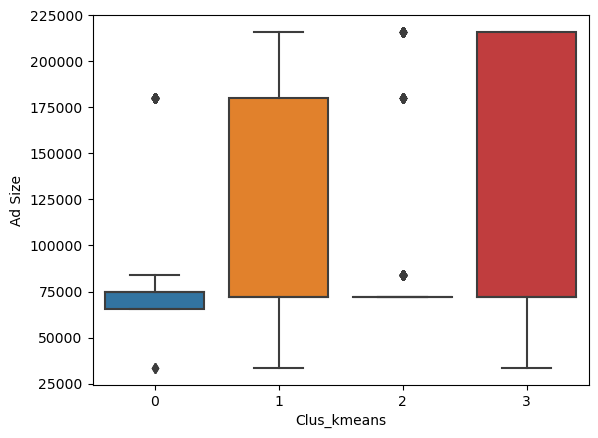

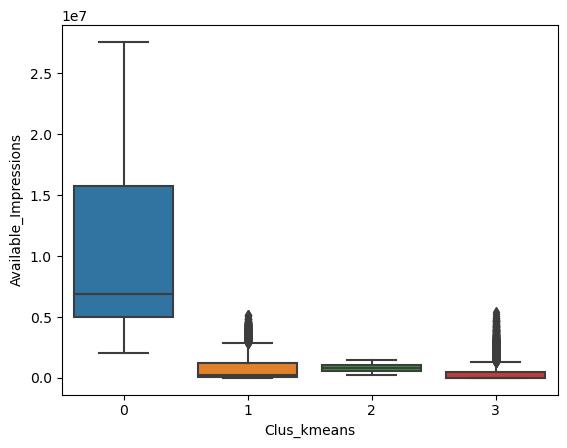

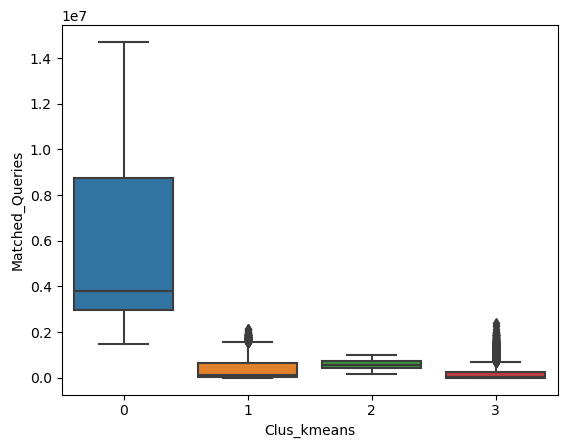

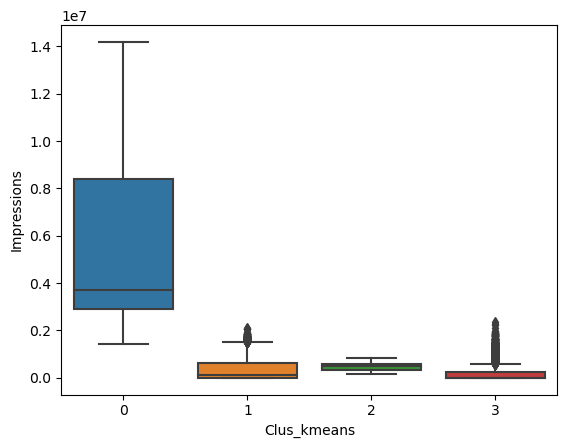

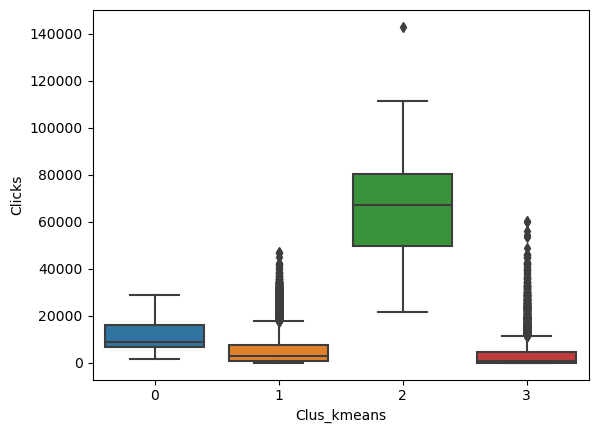

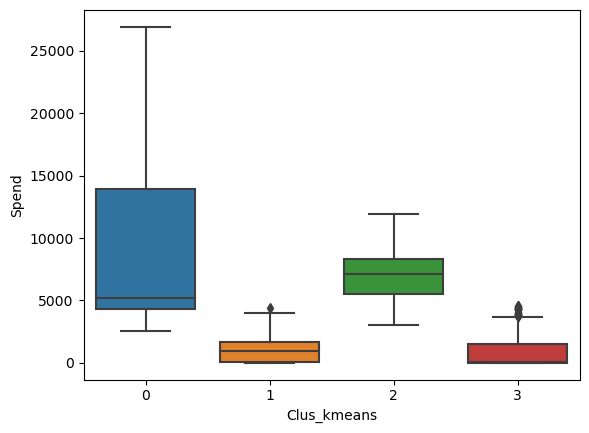

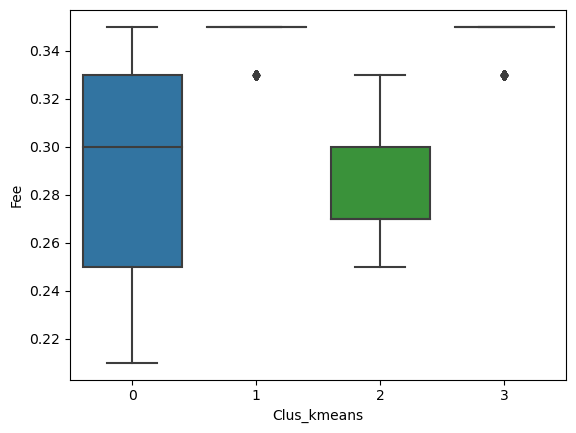

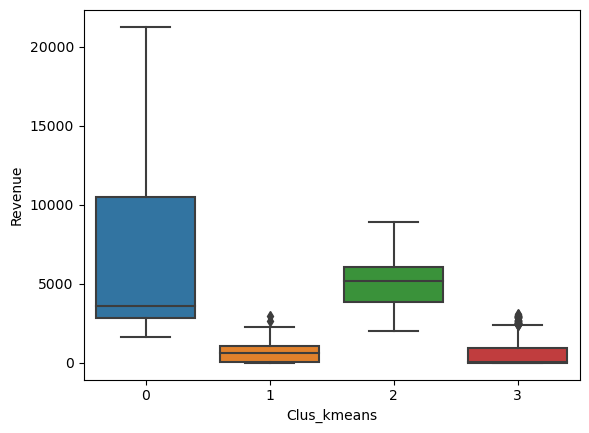

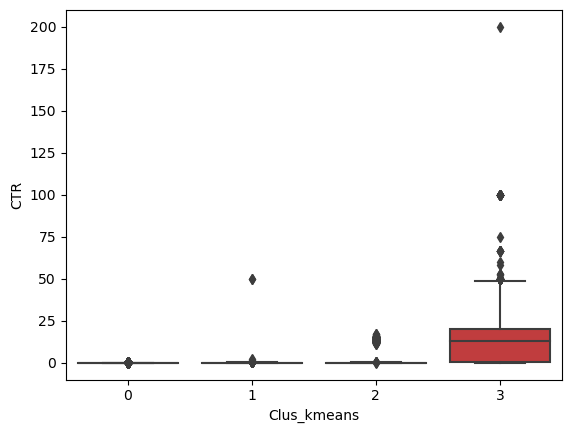

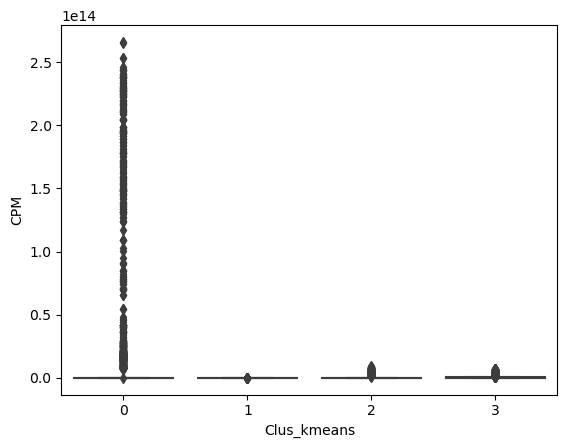

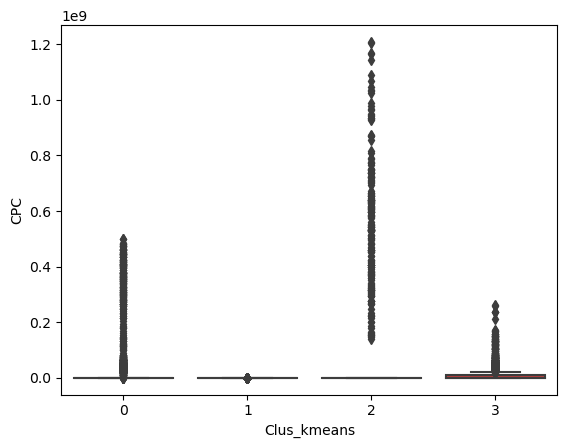

In [61]:
cols_visualise = ['Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

for col in cols_visualise:
    sns.boxplot(x = 'Clus_kmeans', y = col, data = data)
    plt.show()

In [62]:
data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  Clus_kmeans  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0            1  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0            1  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0            1  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0            1  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0            1

## Actionable Insights and Business Recommendations:

1. Cluster 1 is the best in terms of the maximum impressions that they are gathering. Cluster 1 advertisements are shown the maximum. From a business perspective, cluster 1 should be used for maximum advertisement impressions.

2. Cluster 3 gathers the highest number of clicks. This shows that the users have clicked on cluster 3 to reach an online property or for online shopping. From a business point of view, Cluster 3 can be used to further increase the revenue as the customers are clicking on this maximum number of times.

3. CTR should be maximum to generate maximum revenue. We see that CTR is the highest for cluster 4. That means, the number of times the ad receives clicks each time the ad is shown is maximum for cluster 4. From a business perspective, cluster 4 ads have been generating the maximum number of clicks by the customers. They can boost up these advertisements to get a maximum reach among the customers.

4. Revenue/Spend is maximum for Cluster 1 with 73% followed by Cluster 3. Thus, Cluster 3 should be used to increase the target audience as their spending is more. This will help to generate more revenue.

5. Revenue seems to be maximum for Cluster 1 as compared to all the clusters, as seen from the boxplot. 




# Problem 2

# 2. PCA:

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

Note: The 24 variables given in the Rubric is just for performing EDA. You will have to consider the entire dataset, including all the variables for performing PCA. 
Data file - PCA India Data Census.xlsx

# Problem Definition - 

## Check shape, Data types, statistical summary - Perform an EDA on the data to extract useful insights 


## Pick 5 variables out of the given 24 variables below for EDA: 

No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F 

# 2.1 Statistical Summary

## 2.1.1 Importing necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 2.1.2 Loading and Reading the data

In [65]:
df = pd.read_excel('PCA+India+Data_Census.xlsx')

In [66]:
df.head(3)

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  

[3 rows x 61 columns]

## 2.1.3 Checking the shape

In [67]:
df.shape
print("There are ", df.shape[0], "rows and", df.shape[1], "columns.")

There are  640 rows and 61 columns.


## 2.1.4 Checking the datatype of the columns

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [69]:
df_cat = df.select_dtypes(include = ['object'])

#### Inferences: 

* There are 640 observations and 61 columns.
* 59 variables are integer data type while 2 are object data type.
* All the variables except State and Area Name are of numeric data type.


In [70]:
df['State'].value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [71]:
df['Area Name'].value_counts()

Raigarh          2
Bijapur          2
Aurangabad       2
Hamirpur         2
Bilaspur         2
                ..
Darbhanga        1
Muzaffarpur      1
Gopalganj        1
Siwan            1
South Andaman    1
Name: Area Name, Length: 635, dtype: int64

In [72]:
print('% of records with 0 value in M_SC field: {:.2%}'.format((df[df.M_SC == 0].shape[0])/df.shape[0]))
print('% of records with 0 value in F_SC field: {:.2%}'.format((df[df.F_SC == 0].shape[0])/df.shape[0]))
print('% of records with 0 value in M_ST field: {:.2%}'.format((df[df.M_ST == 0].shape[0])/df.shape[0]))
print('% of records with 0 value in F_ST field: {:.2%}'.format((df[df.F_ST == 0].shape[0])/df.shape[0]))

% of records with 0 value in M_SC field: 6.88%
% of records with 0 value in F_SC field: 7.03%
% of records with 0 value in M_ST field: 8.75%
% of records with 0 value in F_ST field: 8.91%


As the percentage is too low of the records having 0 value in the four fields, namely, M_SC, F_SC, M_ST, F_ST, hence, we would not delete these fields.

## 2.1.5 EDA OF ANY 5 FIELDS

### Out of the given 24 fields, the five fields that I have selected to perform EDA are M_LIT, F_LIT, TOT_WORK_M, TOT_WORK_F and F_ILL

In [73]:
df[['M_LIT','F_LIT','TOT_WORK_M', 'TOT_WORK_F', 'F_ILL']].describe().T

count          mean           std    min       25%      50%  \
M_LIT       640.0  57967.979688  55910.282466  286.0  21298.00  42693.5   
F_LIT       640.0  66359.565625  75037.860207  371.0  20932.00  43796.5   
TOT_WORK_M  640.0  37992.407813  36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F  640.0  41295.760938  37192.360943  357.0  16097.75  30588.5   
F_ILL       640.0  56012.518750  47116.693769  327.0  22367.00  42386.0   

                 75%       max  
M_LIT       77989.50  403261.0  
F_LIT       84799.75  571140.0  
TOT_WORK_M  50226.75  269422.0  
TOT_WORK_F  53234.25  257848.0  
F_ILL       78471.00  254160.0

#### Inferences:

* The literate males range from a minimum of 286 to a maximum of 403261.
* The literate females range from a minimum of 371 to a maximum of 571140.
* The maximum number of literate females is much more than the literate males. 
* The mean literacy rate of females is much more than that compared to the males. 
* The range of total working male population is very high from 100 to 269422.
* The range of total working female population is also quite high, from 357 to 257848.
* The mean working population of females is higher than the mean working male population.
* 78471 constitutes 75% of the female population who are illiterate.
* The standard deviation of literate females is the highest.
* The average female illiterate population is around 56000.

## 2.1.6 EDA - Data Visualisation

### 2.1.6.1 Univariate Analysis of the 5 numeric variables

Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept column name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [74]:
# Make a dataset df_num with only the 5 numeric variables.

df_num = df[['M_LIT', 'F_LIT', 'TOT_WORK_M', 'TOT_WORK_F', 'F_ILL']]
#df_eda = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

5

In [75]:
def univariateAnalysis_numeric (column, nbins) :
    print ("Description of " +  column)
    print("---------")
    print(df[column].describe().round(2), end=' ')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 5))
          
    ax = axs[0].hist(df[column], bins=nbins, histtype="bar", edgecolor='Black', color='cyan', lw=2)
    axs[0].set_title("Distribution of " + column)
          
    for container in axs[0].containers:
        axs[0].bar_label (container, label_type="edge", fontsize=10)

    sns.boxplot (y=df[column], orient= 'v', ax=axs[1]) 
    axs[1].set_title("Boxplot of " + column)
    
    plt.tight_layout() #neat output
    plt.show()

Description of M_LIT
---------
count       640.00
mean      57967.98
std       55910.28
min         286.00
25%       21298.00
50%       42693.50
75%       77989.50
max      403261.00
Name: M_LIT, dtype: float64 

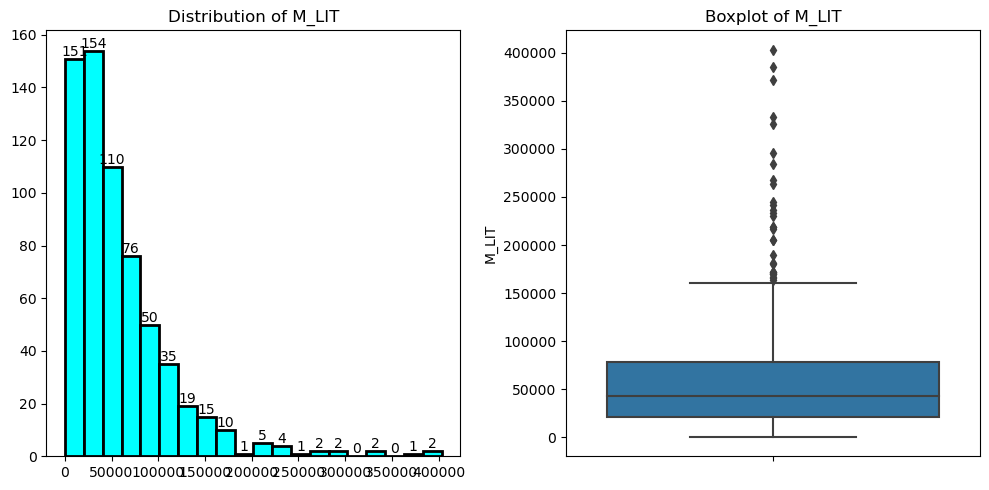

Description of F_LIT
---------
count       640.00
mean      66359.57
std       75037.86
min         371.00
25%       20932.00
50%       43796.50
75%       84799.75
max      571140.00
Name: F_LIT, dtype: float64 

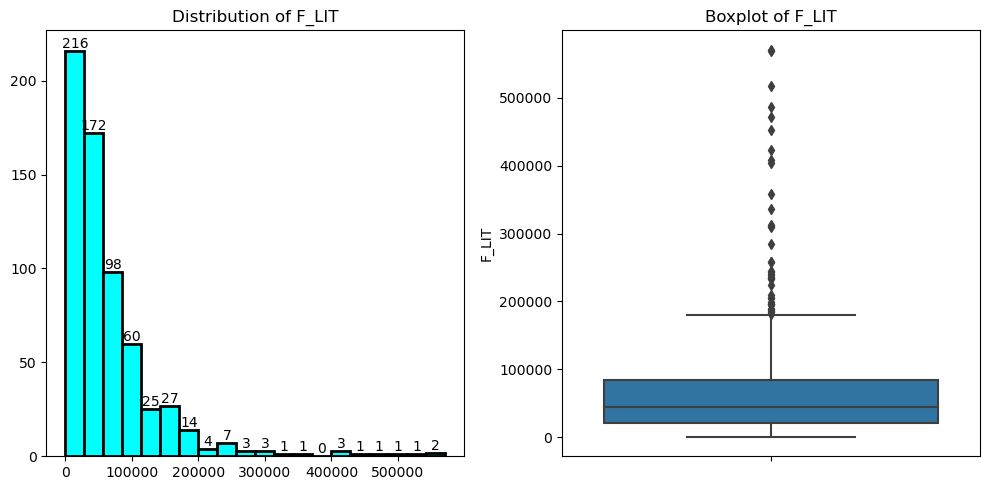

Description of TOT_WORK_M
---------
count       640.00
mean      37992.41
std       36419.54
min         100.00
25%       13753.50
50%       27936.50
75%       50226.75
max      269422.00
Name: TOT_WORK_M, dtype: float64 

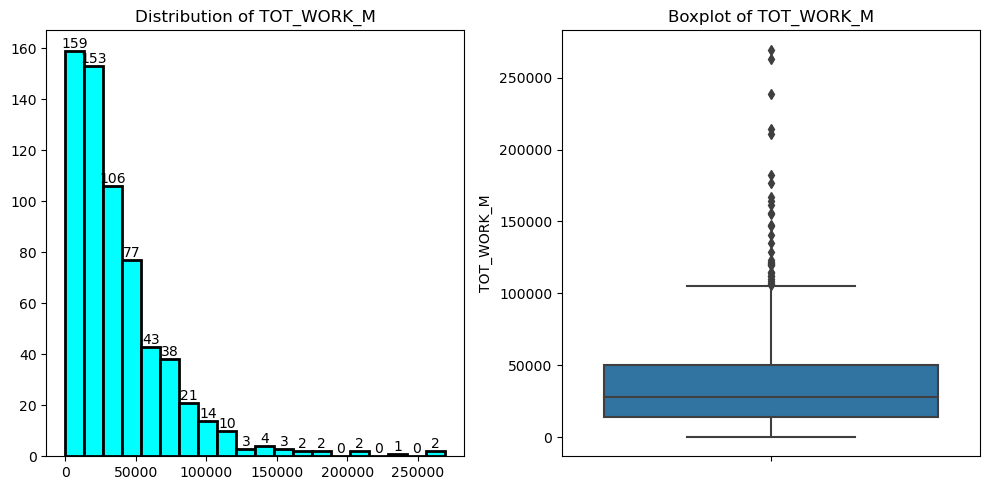

Description of TOT_WORK_F
---------
count       640.00
mean      41295.76
std       37192.36
min         357.00
25%       16097.75
50%       30588.50
75%       53234.25
max      257848.00
Name: TOT_WORK_F, dtype: float64 

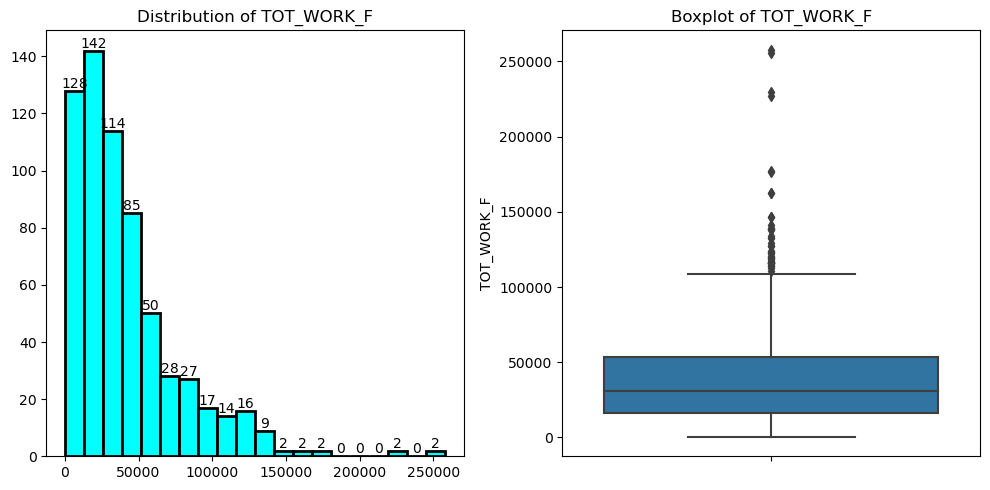

Description of F_ILL
---------
count       640.00
mean      56012.52
std       47116.69
min         327.00
25%       22367.00
50%       42386.00
75%       78471.00
max      254160.00
Name: F_ILL, dtype: float64 

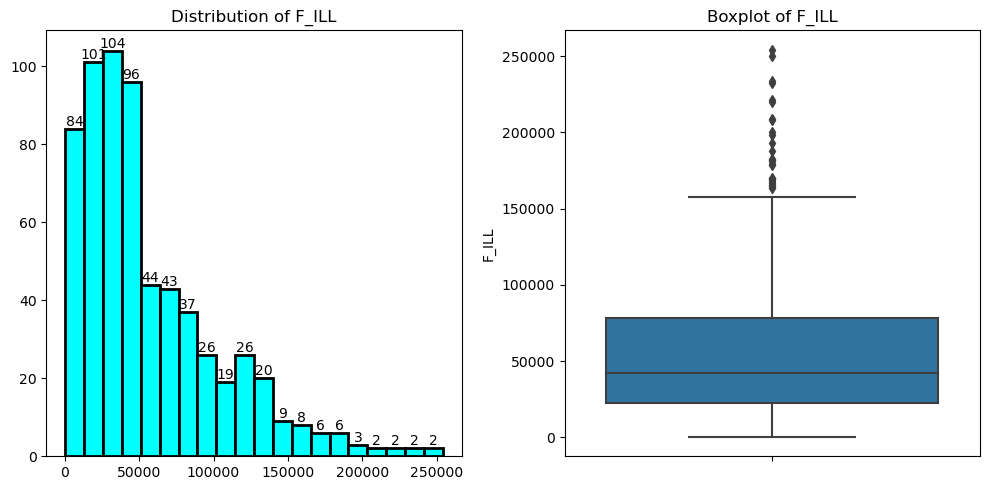

In [76]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)


#### Inferences:
* All the 5 variables namely, M_LIT, F_LIT, TOT_WORK_M, TOT_WORK_F and F_ILL are right-skewed.
* All the five variables have outliers which need to be treated.


### 2.1.6.2 Bivariate Analysis
### Numeric Vs Numeric

<Figure size 1000x800 with 0 Axes>

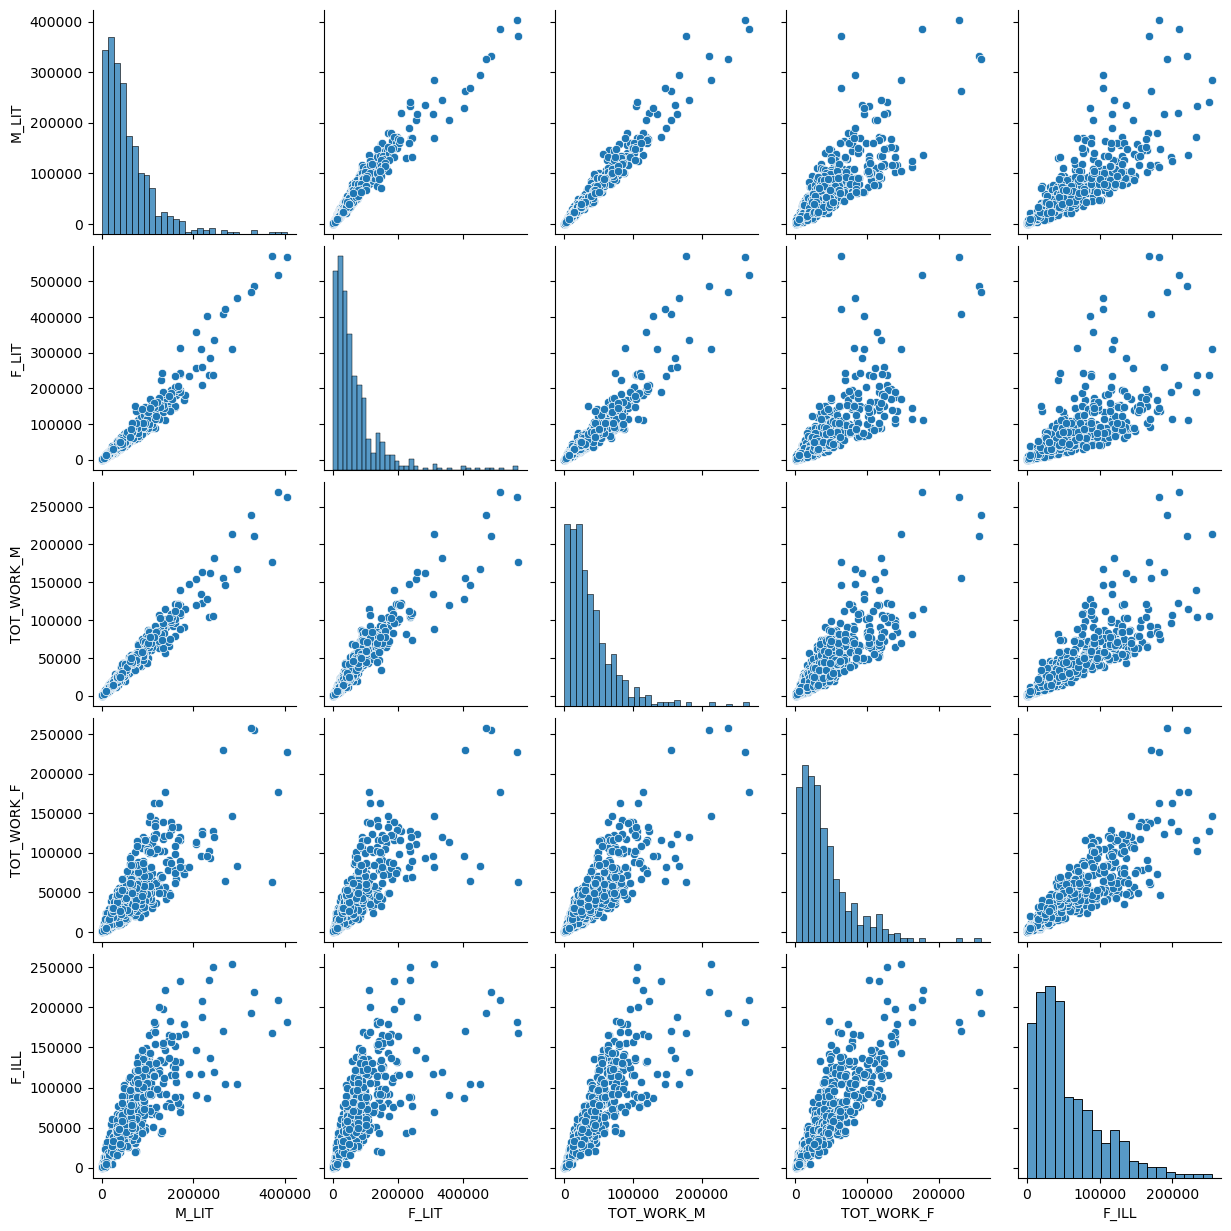

In [77]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df[['M_LIT','F_LIT','TOT_WORK_M','TOT_WORK_F','F_ILL']]);
corner=True

#### Inferences:

* There is correlation between all these variables:
a) M_LIT and F_ILL
b) M_LIT and TOT_WORK_F
c) M_LIT and TOT_WORK_M
d) M_LIT and F_LIT
e) F_LIT and F_ILL
f) F_LIT and TOT_WORK_F
g) F_LIT and TOT_WORK_M
h) TOT_WORK_M and F_ILL
i) TOT_WORK_M and TOT_WORK_F
j) TOT_WORK_F and F_ILL

As one variable increases, the other variable also increases, indicating positive correlation.


### 2.1.6.3 Multivariate Analysis

#### Correlation between all the 5 numeric variables

In [78]:
corr = df_num.corr(method='pearson')
corr
corr.to_excel('correlation matrix.xlsx')

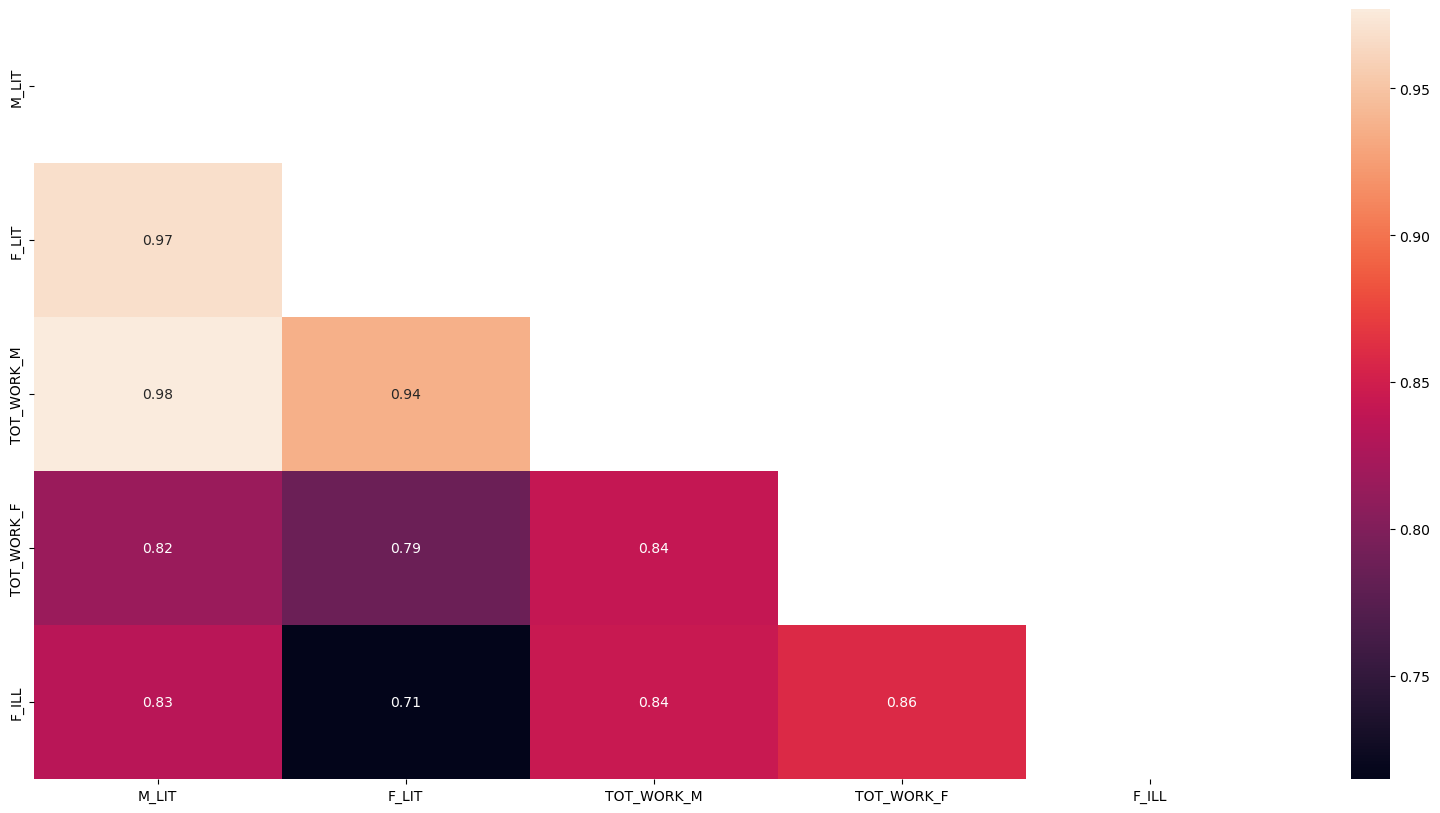

In [79]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### Inferences:
* From the heatmap, it is clearly seen that the correlation between these variables is very high:
a) M_LIT and TOT_WORK_M
b) F_LIT and TOT_WORK_M
c) F_LIT and M_LIT

* The correlation between F_LIT and F_ILL is the least.

## 2.1.7 GROUP BY

### a) Which state has the highest and the lowest gender ratio?

In [80]:
df_male=df.groupby(['State'])['TOT_M'].mean().sort_values(ascending=False)
df_female=df.groupby(['State'])['TOT_F'].mean().sort_values(ascending=False)
gender_ratio = df_male/df_female
gender_ratio.sort_values(ascending=False).head(3)

State
Lakshadweep     0.868061
Haryana         0.779129
NCT of Delhi    0.775077
dtype: float64

#### The gender ratio, that is, the number of males to the number of females is highest in Lakshadweep followed by Haryana. In Lakshadweep, the gender ratio is 0.86.

In [81]:
gender_ratio.sort_values(ascending=False).tail(3)

State
Chhattisgarh      0.549200
Tamil Nadu        0.547921
Andhra Pradesh    0.537024
dtype: float64

#### The gender ratio is the lowest in the State of Andhra Pradesh. In Andhra Pradesh, the gender ratio is 0.53.

### b) Which district has the highest and the lowest gender ratio?

In [82]:
dist_male=df.groupby(['Area Name'])['TOT_M'].mean().sort_values(ascending=False)
dist_female=df.groupby(['Area Name'])['TOT_F'].mean().sort_values(ascending=False)
gender_ratio_dist = dist_male/dist_female
gender_ratio_dist.sort_values(ascending=False).head(3)

Area Name
Lakshadweep       0.868061
Badgam            0.847762
Mahamaya Nagar    0.847313
dtype: float64

#### Lakshadweep district has the highest gender ratio of 0.86.

In [83]:
gender_ratio_dist.sort_values(ascending=False).tail(3)

Area Name
Virudhunagar    0.449352
Koraput         0.440769
Krishna         0.437972
dtype: float64

#### Krishna district has the lowest gender ratio.

# 2.2. PCA : Data Preprocessing

In [84]:
# Check for appropriateness of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

All the fields are non-null type. 59 fields are integer datatype while 2 are object datatype.

### 2.2.1 Check for duplicate rows

In [85]:
#Check for presence of duplicate rows
dup = df.duplicated()
print("No. of duplicate rows is", dup.sum())


No. of duplicate rows is 0


### 2.2.2 Check for Missing values

In [86]:
#Check for presence of missing values
pd.options.display.max_rows = None
df.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


There aren't any missing values in any columns in the dataset.

### 2.2.3 Dropping the object datatype columns

In [87]:
#Drop all columns other than the ones suitable for PCA
df['State'].nunique()

35

The column 'State' is of object datatype and has 35 unique entries. 
We can drop this column as it does not add value to our analysis.

In [88]:
df['Area Name'].nunique()

635

The column 'Area Name' is of object datatype and has 635 unique entries.
We can drop this column as it does not add any value to our analysis.

In [89]:
df['State Code'].nunique()

35

In [90]:
df['Dist.Code'].nunique()

640

In [91]:
# Dropping State, Area Name, State Code and DIist.Code columns as they are not useful for PCA
df1=df.drop(['State','Area Name','Dist.Code', 'State Code'], axis=1)
df1.head(5)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0   7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1   6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2   4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3   1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4  11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   

   MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  \
0           1150            749            180            237            680   
1            525            715            123            229            186   
2            114            188             44             89              3   
3            194            247             61            128             13   
4            874           1928            465           1043            205   

   MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0            252             32             46         258         214  
1            148             76            178         140         160  
2             34              0              4          67          61  
3             50              4             10         116          59  
4            302             24            105         180         478  

[5 rows x 57 columns]

After dropping the 4 columns namely, State, Area Name, State Code and District Code, the number of columns left in the dataset is 57 columns.

In [92]:
#Check the number of features
len(df1.columns)

57

### 2.2.4 Checking for Outliers / Visualisation of data before scaling

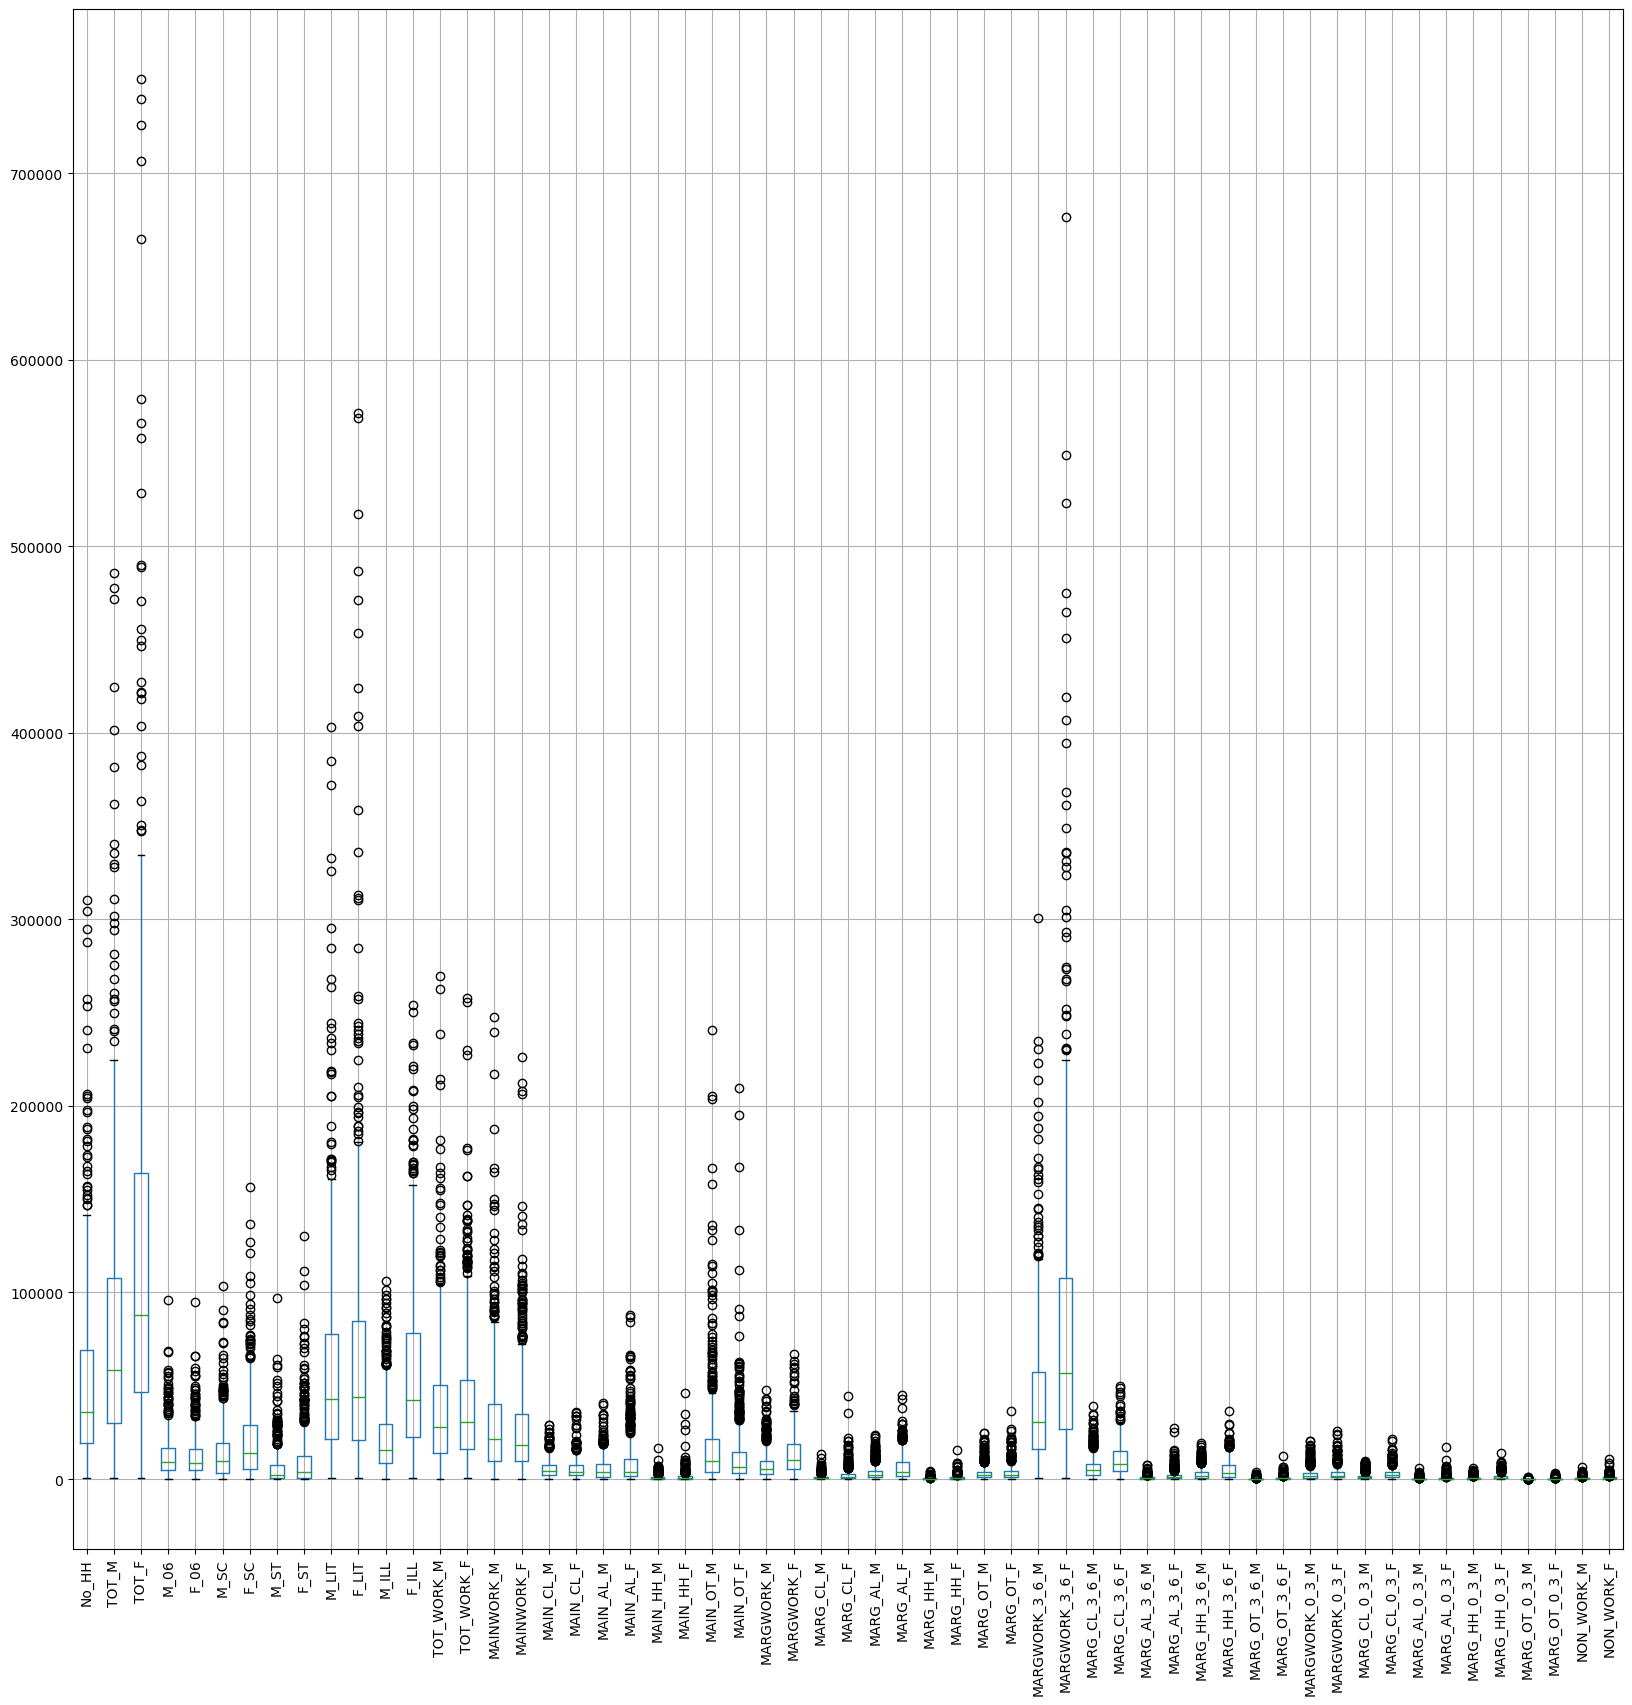

In [93]:
df1.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

#### Inferences:

All the fields have outliers. Most of them are right-skewed. 
The outlier treatment needs to be done before proceeding further.

### 2.2.5 Treatment of outliers in the dataset

In [94]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
feature_list = df1.columns

def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   


In [95]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df1[i])
    df1[i] = np.where(df1[i] > UL, UL, df1[i])
    df1[i] = np.where(df1[i] < LL, LL, df1[i])

### 2.2.6 Visualisation after treatment of outliers

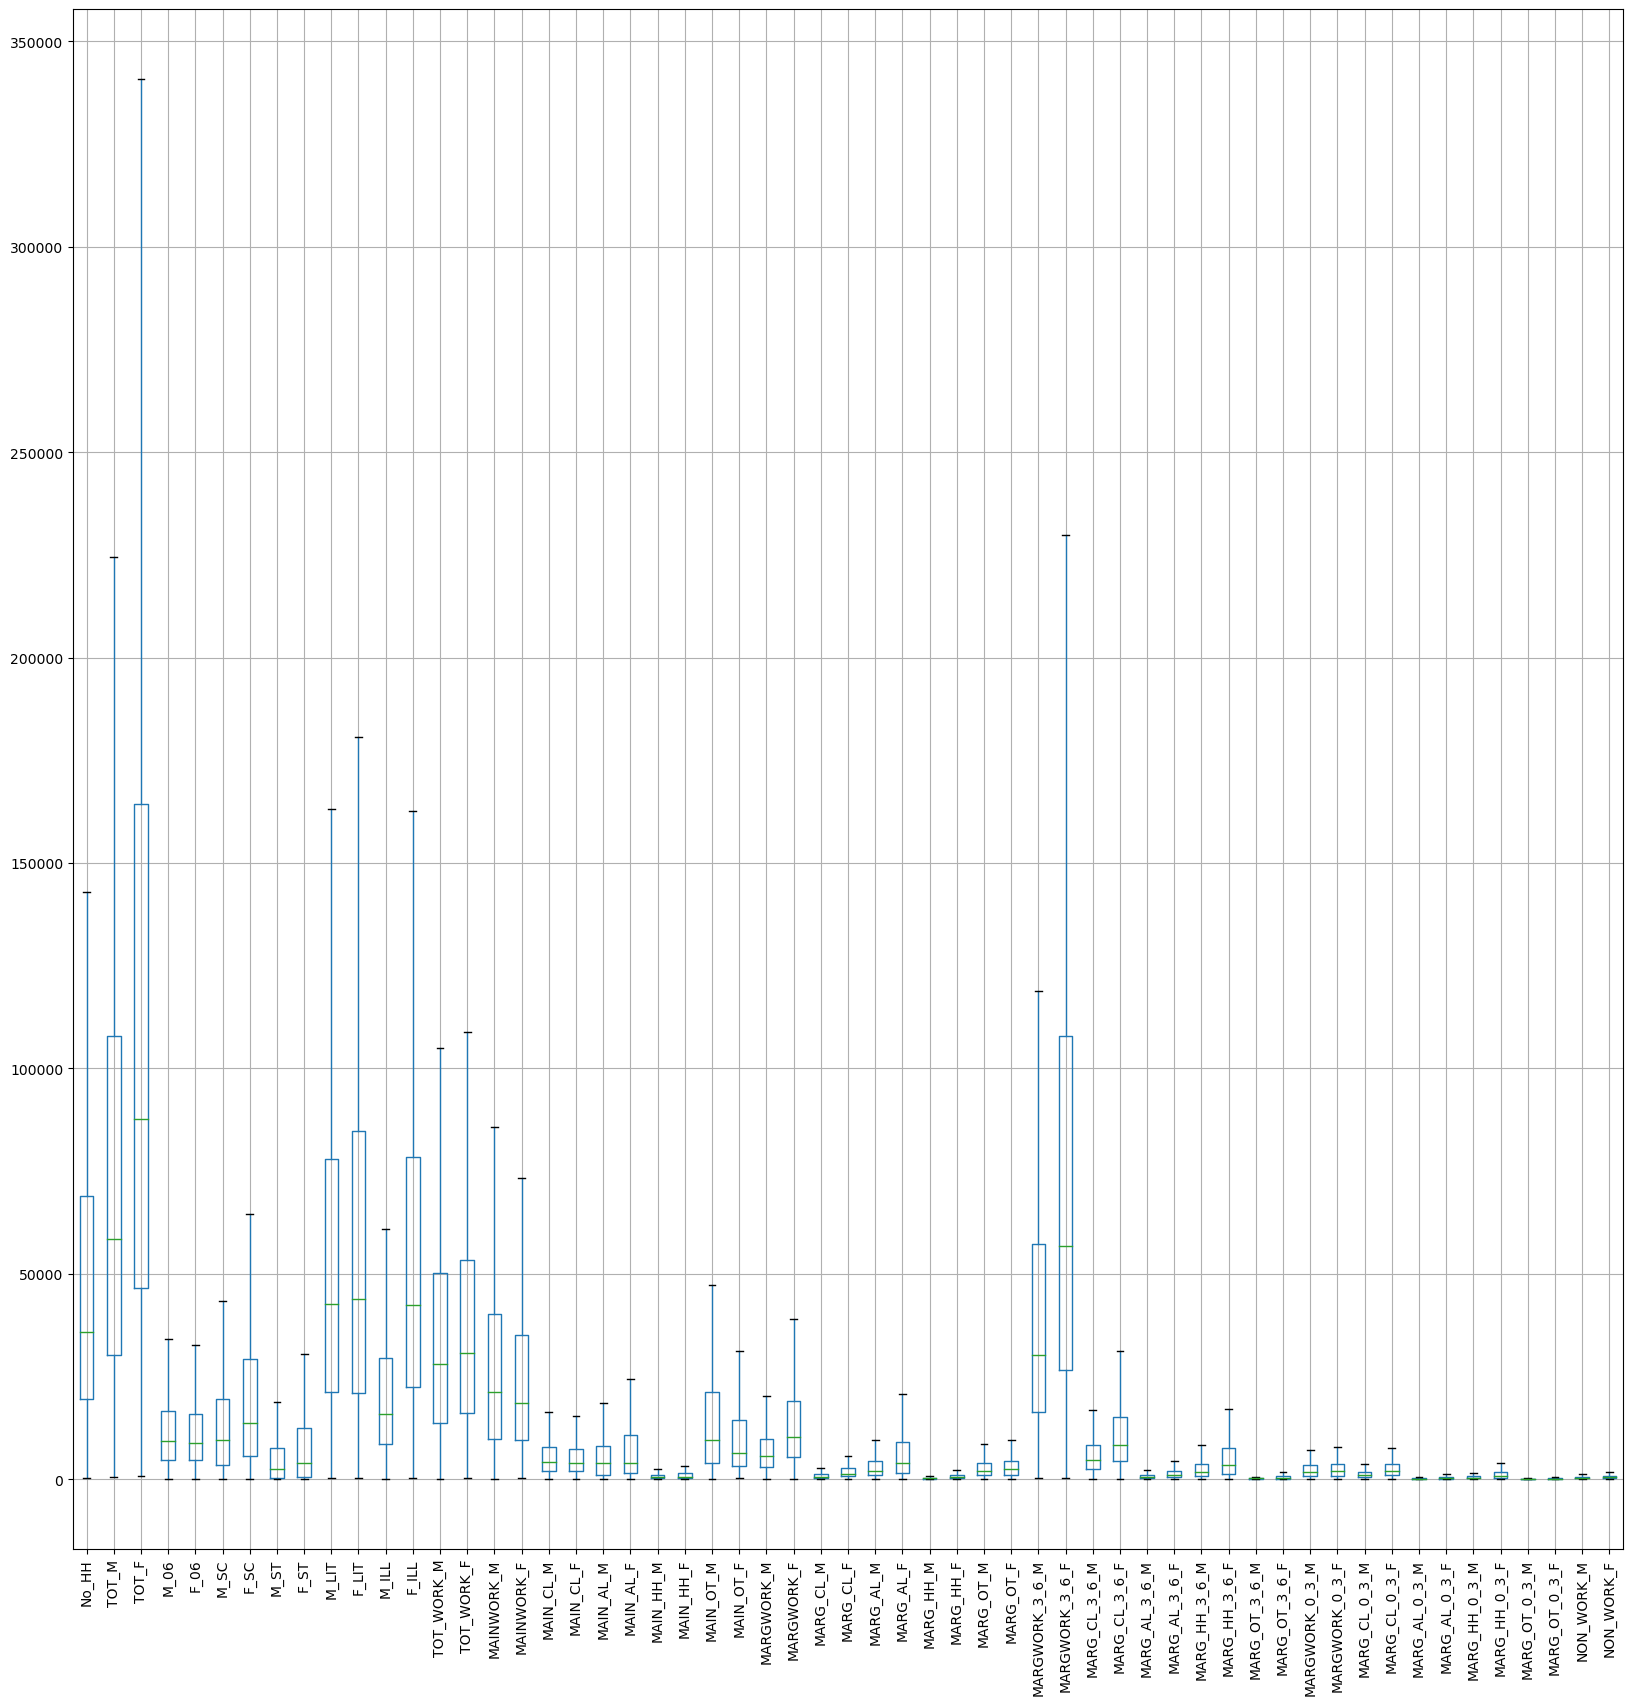

In [96]:
#Check for presence of outliers in each feature

df1.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

After treating the outliers, visualize the data using boxplots for all the fields. We see that there are no outliers for any of the fields.

### 2.2.7 Scaling the data or Standardizing the data

In [97]:
#Check the descriptive stats to observe scale issues between the variables
df1.describe().T

count           mean           std    min       25%      50%  \
No_HH           640.0   48515.542188  39308.008223  350.0  19484.00  35837.0   
TOT_M           640.0   76041.601953  60233.862106  391.0  30228.00  58339.0   
TOT_F           640.0  116079.808594  92154.544396  698.0  46517.75  87724.5   
M_06            640.0   11638.096875   9253.649941   56.0   4733.75   9159.0   
F_06            640.0   11234.508203   8983.799265   56.0   4672.25   8663.0   
M_SC            640.0   13173.196875  12201.892925    0.0   3466.25   9591.5   
F_SC            640.0   19764.365039  18315.276108    0.0   5603.25  13709.0   
M_ST            640.0    5068.761133   6018.652465    0.0    293.75   2333.5   
F_ST            640.0    8345.648047  10017.707451    0.0    429.50   3834.5   
M_LIT           640.0   54544.874219  43843.469970  286.0  21298.00  42693.5   
F_LIT           640.0   59660.232617  50040.153839  371.0  20932.00  43796.5   
M_ILL           640.0   21015.863672  17092.275090  105.0   8590.00  15767.5   
F_ILL           640.0   54785.748437  43465.547626  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   35782.703125  28725.107777  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   39233.218750  30721.557633  357.0  16097.75  30588.5   
MAINWORK_M      640.0   28045.720313  23727.720257   65.0   9787.00  21250.5   
MAINWORK_F      640.0   25546.617578  21604.037130  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5249.962891   4164.050739    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5165.975391   4181.216522    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5548.176562   5425.100715    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    7328.182031   8000.284978    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     751.509570    735.002639    0.0    187.50    498.5   
MAIN_HH_F       640.0     989.246875   1009.141342    0.0    248.75    540.5   
MAIN_OT_M       640.0   14800.163281  14092.652625   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   10146.224414   9443.398789  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7220.775195   5724.940323   35.0   2937.50   5627.0   
MARGWORK_F      640.0   12776.218945   9911.974393  117.0   5424.50  10175.0   
MARG_CL_M       640.0     901.500195    814.114370    0.0    311.75    606.5   
MARG_CL_F       640.0    1868.833984   1698.352113    0.0    630.25   1226.0   
MARG_AL_M       640.0    2977.746875   2791.600931    0.0    873.50   2062.0   
MARG_AL_F       640.0    6213.292578   5969.560343    0.0   1402.50   4020.5   
MARG_HH_M       640.0     254.066016    241.037359    0.0     71.75    166.0   
MARG_HH_F       640.0     654.295898    620.981507    0.0    171.75    429.0   
MARG_OT_M       640.0    2777.726953   2451.949661    7.0    935.50   2036.0   
MARG_OT_F       640.0    3115.222266   2639.126796   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   39765.289844  31612.687654  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   75313.031250  62629.054261  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    5985.385938   4810.570689   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10153.139453   7840.058570   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     705.154688    627.550509    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1450.318164   1298.151731    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2522.778906   2389.164420    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5022.515625   4852.535833    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     197.101562    186.488037    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     488.081250    466.500647    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2319.756250   2057.612112    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2503.137500   2161.619027   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1243.500000    999.851461    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2554.161719   2098.515606   30.0    957.25   1928.0   
MARG_AL_0_3_M   

In [98]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df1.apply(zscore)

In [99]:
#Check the data post scaling
df_pca_scaled

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0   -1.038986 -0.874837 -0.937027 -0.624685 -0.561282 -1.080201 -1.079963   
1   -1.076896 -0.938023 -1.009723 -0.773932 -0.835657 -1.079873 -1.079635   
2   -1.121858 -1.154665 -1.141539 -1.141642 -1.138104 -1.080201 -1.079635   
3   -1.201599 -1.217171 -1.214930 -1.197772 -1.176091 -1.080447 -1.079963   
4   -0.938495 -0.921309 -0.935018 -0.700931 -0.740523 -1.078807 -1.078160   
5   -0.819062 -0.843235 -0.854167 -0.592997 -0.661764 -0.868183 -0.861395   
6   -0.916701 -0.884722 -0.929479 -0.833847 -0.895033 -0.641074 -0.702606   
7   -0.995526 -0.881948 -0.929284 -0.799455 -0.794885 -1.080447 -1.079963   
8   -1.138102 -1.091977 -1.118799 -1.080645 -1.053330 -1.080447 -1.079963   
9   -0.850887 -0.615211 -0.692876 -0.580668 -0.616091 -1.079545 -1.079799   
10  -1.161932 -1.143135 -1.153235 -1.107683 -1.105464 -1.080447 -1.079963   
11  -1.118192 -1.067869 -1.090813 -1.002236 -1.000416 -1.080447 -1.079963   
12  -1.178608 -1.176099 -1.182502 -1.161866 -1.151583 -1.080447 -1.079963   
13  -1.012100 -0.841208 -0.914211 -0.668810 -0.726152 -1.080447 -1.079963   
14  -1.143295 -1.137519 -1.143299 -1.125311 -1.119946 -1.080447 -1.079854   
15  -1.043467 -1.045705 -1.055095 -0.981796 -0.971006 -0.932732 -0.934889   
16  -1.135479 -1.151093 -1.155776 -1.118281 -1.107247 -1.049034 -1.049582   
17  -1.135606 -1.153669 -1.155309 -1.136126 -1.126741 -1.038126 -1.042042   
18  -0.952193 -0.873042 -0.924169 -0.797292 -0.815828 -0.543799 -0.636271   
19  -1.105818 -1.095051 -1.113076 -1.058907 -1.060459 -0.967754 -0.979641   
20   0.065724  0.286232  0.133567  0.391060  0.088505  0.668928  0.503615   
21  -0.970651 -0.975706 -0.994345 -0.909227 -0.978581 -0.712348 -0.728506   
22  -0.762897 -0.711545 -0.723262 -0.637771 -0.629124 -0.534695 -0.559335   
23   0.986154  0.945746  1.026038  1.017681  0.814155  1.003399  1.046592   
24  -1.208448 -1.243373 -1.234999 -1.237787 -1.229228 -1.074214 -1.072368   
25  -0.877060 -0.898380 -0.888429 -0.923395 -0.909292 -0.587105 -0.586765   
26  -0.063460 -0.119089 -0.055112 -0.094750 -0.167043  0.439111  0.489463   
27  -0.405872 -0.511086 -0.427441 -0.467759 -0.542679 -0.349415 -0.305414   
28  -0.600463 -0.541192 -0.575732 -0.532108 -0.606844 -0.374513 -0.407977   
29  -0.786575 -0.754578 -0.774727 -0.764523 -0.811706 -0.493112 -0.518627   
30  -0.784437 -0.722644 -0.744623 -0.723101 -0.716461 -0.299712 -0.348308   
31  -0.898803 -0.830242 -0.871705 -0.774473 -0.785416 -0.415358 -0.486716   
32  -0.500990 -0.534612 -0.507087 -0.630417 -0.637702 -0.100899 -0.093949   
33  -1.146249 -1.208780 -1.182937 -1.205234 -1.199596 -1.034599 -1.021168   
34   0.562932  1.129208  0.799904  0.987832  0.723477  1.678248  1.283410   
35  -0.489024 -0.385244 -0.435227 -0.504422 -0.541676  0.315919  0.194833   
36   0.880444  1.231606  1.034596  0.799326  0.612635  2.477110  2.446907   
37   0.573600  0.705809  0.640286  0.584432  0.399976  2.276820  2.140906   
38  -0.561076 -0.515422 -0.547691 -0.612680 -0.640932  0.512928  0.429957   
39  -0.863795 -0.780563 -0.839071 -0.861101 -0.889128 -0.396658 -0.474093   
40   1.119463  1.854417  1.442284  1.393178  1.140999  2.477110  2.329147   
41  -0.549644 -0.328105 -0.470337 -0.470355 -0.545464  0.311408  0.095166   
42  -0.065471  0.384908  0.138161  0.315571  0.151111  1.996071  1.611098   
43  -0.674526 -0.469814 -0.600590 -0.536867 -0.619321  0.414178  0.191063   
44  -0.877391 -0.779234 -0.848454 -0.829629 -0.860053 -0.236640 -0.347652   
45  -0.431230 -0.186612 -0.332634 -0.320459 -0.371237  0.557956  0.351164   
46  -0.790853 -0.669177 -0.757720 -0.733484 -0.776393 -0.193416 -0.304703   
47  -0.048210  0.291350  0.105234  0.168379  0.035034  0.632757  0.419685   
48   0.560921  1.176328  0.829519  0.980694  0.703982  2.370978  1.868406   
49  -0.335246  0.094263 -0.137299  0.116683 -0.078815  0.840757  0.532958   
50  -0.660064 -0.517017 -0.600134 -0.570502 -0.641155 -0.209574 -0.304048   
51  

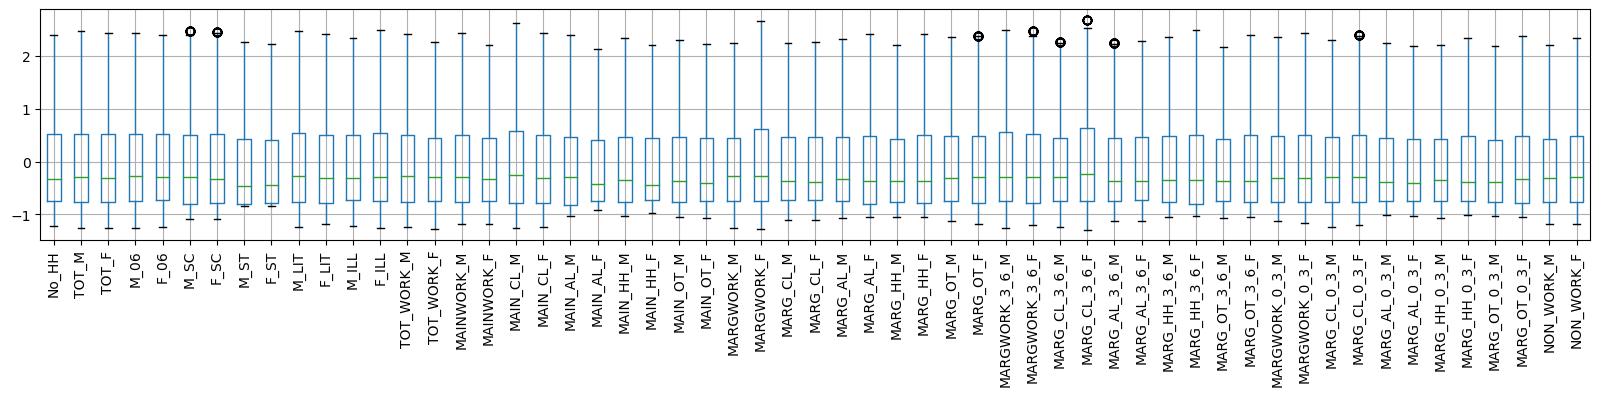

In [100]:
df_pca_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

### 2.2.8 Significance of correlation test - Bartlett Sphericity Test

Bartletts Test of Sphericity to Statisticaly confirm presence of Multicolinearity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

H0: All variables in the data are uncorrelated
Ha: At least one pair of variables in the data are correlated
If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of variables in the data wihich are correlated hence PCA is recommended.

In [101]:
#Confirm the statistical significance of correlations

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

#### Inferences:

As the p_value < 0.05, we can say that the alternate hypothesis is true. 
So, there are significant correlations between the fields.

### 2.2.9 Kmo Test to check the adequacy of sample size

KMO Test to check enough number of observations there to perform PCA
The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [102]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.9361896166652829

As the kmo_model test gives a value of 0.93 which is greater than 0.7, we can say that the sample size is adequate.

## 2.3 PCA 

### 2.3.1 Generating the Correlation Matrix and the Covariance Matrix

In [103]:
# Generating the Correlation Matrix
corr_matrix = df_pca_scaled.corr()
print(corr_matrix.round(2))

                No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  \
No_HH            1.00   0.91   0.97  0.81  0.81  0.81  0.86  0.12  0.12   
TOT_M            0.91   1.00   0.98  0.96  0.96  0.88  0.86  0.02  0.01   
TOT_F            0.97   0.98   1.00  0.91  0.91  0.86  0.88  0.08  0.07   
M_06             0.81   0.96   0.91  1.00  1.00  0.83  0.80 -0.01 -0.02   
F_06             0.81   0.96   0.91  1.00  1.00  0.82  0.79  0.01 -0.01   
M_SC             0.81   0.88   0.86  0.83  0.82  1.00  0.98 -0.10 -0.10   
F_SC             0.86   0.86   0.88  0.80  0.79  0.98  1.00 -0.05 -0.05   
M_ST             0.12   0.02   0.08 -0.01  0.01 -0.10 -0.05  1.00  0.99   
F_ST             0.12   0.01   0.07 -0.02 -0.01 -0.10 -0.05  0.99  1.00   
M_LIT            0.93   0.99   0.98  0.92  0.91  0.87  0.86  0.03  0.02   
F_LIT            0.94   0.94   0.96  0.84  0.83  0.80  0.82  0.05  0.04   
M_ILL            0.78   0.93   0.88  0.97  0.97  0.82  0.78  0.02  0.01   
F_ILL            0.89   0

In [104]:
# Generating the Covariance Matrix
cov_matrix = np.cov(df_pca_scaled.T)
print(cov_matrix.round(2))

[[1.   0.91 0.97 ... 0.65 0.77 0.8 ]
 [0.91 1.   0.98 ... 0.73 0.87 0.79]
 [0.97 0.98 1.   ... 0.71 0.84 0.81]
 ...
 [0.65 0.73 0.71 ... 1.   0.76 0.72]
 [0.77 0.87 0.84 ... 0.76 1.   0.9 ]
 [0.8  0.79 0.81 ... 0.72 0.9  1.  ]]


#### Inferences:

We see that once the data is scaled, the correlation matrix and the covariance matrix are the same.

### 2.3.2  Fit and Transform PCA Model

In [105]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=42)
pca_transformed = pca.fit_transform(df_pca_scaled)
pca_transformed.round(2)

array([[-5.53,  0.43, -1.47, ...,  0.01,  0.  ,  0.  ],
       [-5.49, -0.11, -2.02, ..., -0.  ,  0.01, -0.01],
       [-7.47, -0.22, -0.25, ..., -0.  , -0.  ,  0.  ],
       ...,
       [-7.89, -1.  , -0.91, ..., -0.  ,  0.  , -0.  ],
       [-7.86, -1.  , -0.85, ..., -0.  , -0.  ,  0.  ],
       [-7.42, -1.41, -0.87, ..., -0.  , -0.  ,  0.  ]])

#### Inferences:
The fit_transform() method will first fit the PCA model to the data. This involves computing the mean and covariance of the data. The model is then used to transform the data into a new space, where the principal components are aligned with the directions of greatest variance in the data.

### 2.3.3 Calculating the Eigen vectors

The Eigen vectors represent the new set of axes of the Principal component space and also the Eigen values carry the information of the amount of variance that each eigenvector has.

Eigen vectors represent the direction of a line. Eigen values are numbers that indicate how spread out a data set is on the line. 

In PCA, eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude.


In [106]:
#Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16, ...,  0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, ...,  0.04, -0.05, -0.04],
       [ 0.1 , -0.04,  0.03, ..., -0.1 , -0.13, -0.03],
       ...,
       [ 0.  , -0.01,  0.02, ..., -0.01,  0.06, -0.01],
       [ 0.  ,  0.05,  0.  , ...,  0.01, -0.08, -0.  ],
       [-0.  , -0.  ,  0.01, ...,  0.  ,  0.01,  0.  ]])

### 2.3.4 Calculating the Eigen values

In [107]:
#Check the eigen values
#Note: This is always returned in descending order

Eigen_values=pca.explained_variance_
Eigen_values.round(2)

array([3.565e+01, 7.640e+00, 3.770e+00, 2.780e+00, 1.910e+00, 1.150e+00,
       9.900e-01, 4.600e-01, 4.000e-01, 3.200e-01, 2.700e-01, 2.400e-01,
       1.800e-01, 1.700e-01, 1.400e-01, 1.300e-01, 1.000e-01, 1.000e-01,
       9.000e-02, 8.000e-02, 7.000e-02, 6.000e-02, 5.000e-02, 5.000e-02,
       4.000e-02, 3.000e-02, 3.000e-02, 3.000e-02, 2.000e-02, 2.000e-02,
       2.000e-02, 2.000e-02, 1.000e-02, 1.000e-02, 1.000e-02, 1.000e-02,
       1.000e-02, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

### 2.3.5 Calculating the Explained variance for each PC


In [108]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
var_exp = pca.explained_variance_ratio_.round(3)
var_exp

array([0.624, 0.134, 0.066, 0.049, 0.033, 0.02 , 0.017, 0.008, 0.007,
       0.006, 0.005, 0.004, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

#### Obtain percentage of variability explained by each PCs

In [109]:
#Expressing in percentage
print(var_exp*100)

[62.4 13.4  6.6  4.9  3.3  2.   1.7  0.8  0.7  0.6  0.5  0.4  0.3  0.3
  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0. ]


### 2.3.6 Calculating the cut-off for selecting the optimum number of PCs

In [110]:
#Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [62.4 75.8 82.4 87.3 90.6 92.6 94.3 95.1 95.8 96.4 96.9 97.3 97.6 97.9
 98.1 98.3 98.5 98.7 98.9 99.  99.1 99.2 99.3 99.4 99.5 99.6 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7]


#### Inferemces:

5 PCs contribute 90% of variance.

90% of variability is explained 5 PCs.

We observe that the cumulative variance reaches 90% at PC5. Hence, we select 5 Principal Components as the optimum number.

### 2.3.7 Creating a scree plot to identify the optimum number of PCs

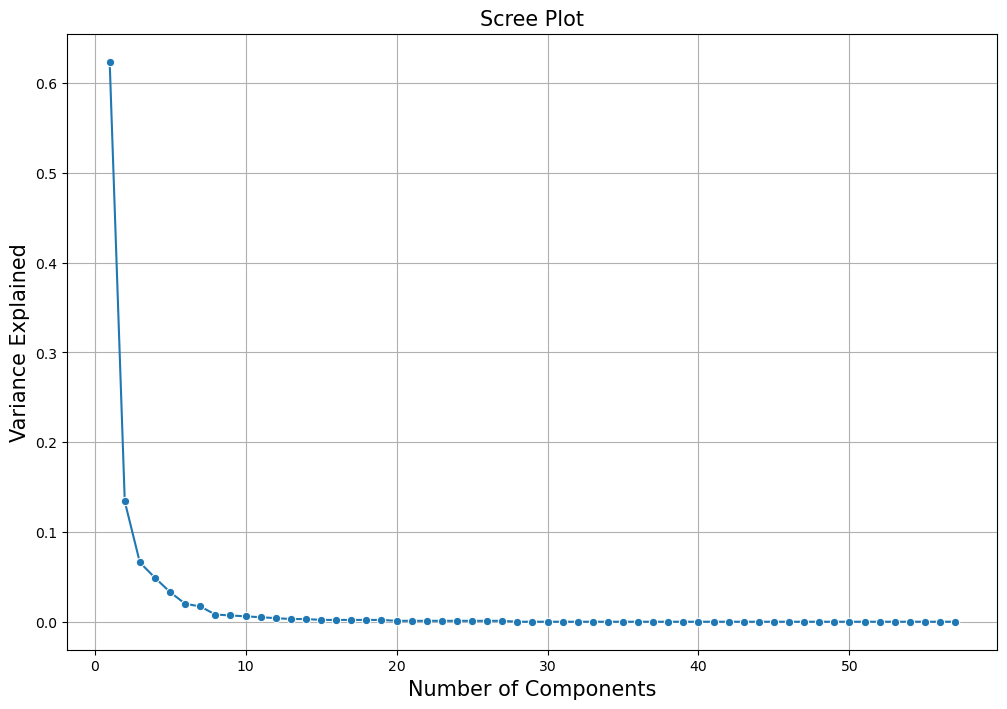

In [111]:
plt.figure(figsize=(12,8))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

### 2.3.7 Creating a bar plot to identify the optimum number of PCs

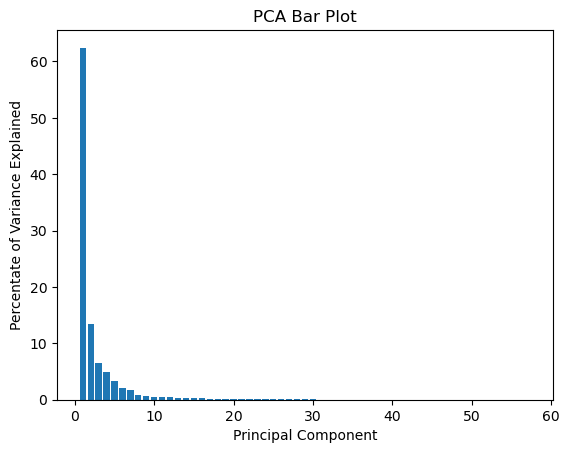

In [112]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
plt.bar(x=range(1,len(var_exp)+1), height=percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Bar Plot')
plt.show()
#PCA in x axis, Eigen value in the y axis

### 2.3.8 Build PCA model with 5 components

In [113]:
# Apply PCA for the number of decided components to get the loadings and component output

# NOTE - we are generating only 5 PCA dimensions (dimensionality reduction from 57 to 5)

pca2 = PCA(n_components=5, random_state=123)
df_pca = pca2.fit_transform(df_pca_scaled)
df_pca

array([[-5.52816148e+00,  4.30377559e-01, -1.47382695e+00,
        -1.27804898e+00,  3.76357641e-01],
       [-5.49201646e+00, -1.06110331e-01, -2.01564100e+00,
        -1.75016759e+00, -6.85689225e-03],
       [-7.47464297e+00, -2.17193764e-01, -2.47428211e-01,
         6.07916548e-03,  5.56282180e-01],
       ...,
       [-7.88626804e+00, -1.00353656e+00, -9.09284569e-01,
        -1.23800927e+00,  1.46031242e-01],
       [-7.86425952e+00, -9.99337996e-01, -8.51569237e-01,
        -7.82561039e-01, -8.16813905e-02],
       [-7.41622568e+00, -1.41214300e+00, -8.65921210e-01,
        -6.80528005e-01,  9.68605787e-02]])

In [114]:
#Eigen Vectors - 5 sets because we gave 5 PCs
#Each Eigen Vector will have 57 coefficients in it
pca2.components_

array([[ 0.14922158,  0.15916917,  0.15820921,  0.15634043,  0.1568144 ,
         0.14335015,  0.14353705,  0.01884873,  0.01787797,  0.15515239,
         0.14544984,  0.1545511 ,  0.15828347,  0.15407627,  0.14252995,
         0.14193201,  0.12573163,  0.11169244,  0.08303496,  0.11929067,
         0.09008881,  0.14184969,  0.13388011,  0.1227618 ,  0.1168656 ,
         0.15665637,  0.14869489,  0.08816344,  0.06516026,  0.1272781 ,
         0.11588826,  0.14536607,  0.14230182,  0.15087675,  0.14801846,
         0.15790761,  0.15583101,  0.15764021,  0.1495015 ,  0.0947852 ,
         0.06715842,  0.12818439,  0.11395923,  0.14510769,  0.14102942,
         0.15092232,  0.14753416,  0.14298675,  0.13378373,  0.06296394,
         0.05674058,  0.11910165,  0.11304417,  0.14213963,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, -0.02034061, -0.01431023,
        -0.07966701, -0.08709832,  0.06910144,  0.06731586, -0.10598636,
        -0.13323

### 2.3.10 Linear Equation

In [115]:
print( 'The Linear equation of 1st component: ')
print( '--------------------------------')
for i in range(0, df_pca_scaled.shape[1]):
    print('{} * {}'.format (np.round (pca2.components_[0][i],3), df_pca_scaled.columns [i]), end=' + ')

The Linear equation of 1st component: 
--------------------------------
0.149 * No_HH + 0.159 * TOT_M + 0.158 * TOT_F + 0.156 * M_06 + 0.157 * F_06 + 0.143 * M_SC + 0.144 * F_SC + 0.019 * M_ST + 0.018 * F_ST + 0.155 * M_LIT + 0.145 * F_LIT + 0.155 * M_ILL + 0.158 * F_ILL + 0.154 * TOT_WORK_M + 0.143 * TOT_WORK_F + 0.142 * MAINWORK_M + 0.126 * MAINWORK_F + 0.112 * MAIN_CL_M + 0.083 * MAIN_CL_F + 0.119 * MAIN_AL_M + 0.09 * MAIN_AL_F + 0.142 * MAIN_HH_M + 0.134 * MAIN_HH_F + 0.123 * MAIN_OT_M + 0.117 * MAIN_OT_F + 0.157 * MARGWORK_M + 0.149 * MARGWORK_F + 0.088 * MARG_CL_M + 0.065 * MARG_CL_F + 0.127 * MARG_AL_M + 0.116 * MARG_AL_F + 0.145 * MARG_HH_M + 0.142 * MARG_HH_F + 0.151 * MARG_OT_M + 0.148 * MARG_OT_F + 0.158 * MARGWORK_3_6_M + 0.156 * MARGWORK_3_6_F + 0.158 * MARG_CL_3_6_M + 0.15 * MARG_CL_3_6_F + 0.095 * MARG_AL_3_6_M + 0.067 * MARG_AL_3_6_F + 0.128 * MARG_HH_3_6_M + 0.114 * MARG_HH_3_6_F + 0.145 * MARG_OT_3_6_M + 0.141 * MARG_OT_3_6_F + 0.151 * MARGWORK_0_3_M + 0.148 * MARGWOR

### 2.3.11 Step 5: Extracting factor loadings (also called as weights or coefficient)

In [116]:
#pca2.components_ is Eigen Vectors whose coefficients is called as loadings here
df_pca_loading = pd.DataFrame(pca2.components_,columns=list(df_pca_scaled))
df_pca_loading.shape

(5, 57)

In [117]:
df_pca_loading.head(5)

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0  0.149222  0.159169  0.158209  0.156340  0.156814  0.143350  0.143537   
1 -0.115487 -0.080239 -0.093718 -0.020341 -0.014310 -0.079667 -0.087098   
2  0.101528 -0.038662  0.028959 -0.074419 -0.068223 -0.037619  0.021350   
3  0.076814  0.052976  0.070022  0.028520  0.016398  0.010210  0.016244   
4 -0.012090 -0.042344 -0.022927 -0.080339 -0.078326 -0.167893 -0.158092   

       M_ST      F_ST     M_LIT  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0  0.018849  0.017878  0.155152  ...       0.142987       0.133784   
1  0.069101  0.067316 -0.105986  ...       0.136839       0.166416   
2  0.323827  0.338705 -0.032107  ...      -0.103565       0.033423   
3  0.091143  0.079554  0.089187  ...      -0.018223       0.005954   
4  0.418412  0.415965 -0.014033  ...       0.094293       0.112351   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0       0.062964       0.056741       0.119102       0.113044       0.142140   
1       0.281881       0.287541       0.182341       0.177112       0.052925   
2      -0.120293      -0.088097       0.026176       0.164774      -0.144419   
3       0.208941       0.240499      -0.240416      -0.189408      -0.167554   
4      -0.018070      -0.036293       0.016981       0.047538       0.014187   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0       0.141370    0.147629    0.142103  
1       0.035109   -0.049122   -0.039848  
2      -0.102175   -0.126673   -0.028545  
3      -0.169020    0.024036    0.057402  
4       0.047504    0.191790    0.249765  

[5 rows x 57 columns]

In [118]:
df_pca_loading.T

0         1         2         3         4
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

### 2.3.11 Creating a dataframe with the coefficients of all PCs

In [119]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca2.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5'],
                                    index = df_pca_scaled.columns)

In [120]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5
No_HH           0.149222 -0.115487  0.101528  0.076814 -0.012090
TOT_M           0.159169 -0.080239 -0.038662  0.052976 -0.042344
TOT_F           0.158209 -0.093718  0.028959  0.070022 -0.022927
M_06            0.156340 -0.020341 -0.074419  0.028520 -0.080339
F_06            0.156814 -0.014310 -0.068223  0.016398 -0.078326
M_SC            0.143350 -0.079667 -0.037619  0.010210 -0.167893
F_SC            0.143537 -0.087098  0.021350  0.016244 -0.158092
M_ST            0.018849  0.069101  0.323827  0.091143  0.418412
F_ST            0.017878  0.067316  0.338705  0.079554  0.415965
M_LIT           0.155152 -0.105986 -0.032107  0.089187 -0.014033
F_LIT           0.145450 -0.133234 -0.005133  0.125412  0.029084
M_ILL           0.154551 -0.009460 -0.047054 -0.034665 -0.104073
F_ILL           0.158283 -0.021793  0.079345 -0.010578 -0.110332
TOT_WORK_M      0.154076 -0.120912 -0.001116  0.069046 -0.023104
TOT_WORK_F      0.142530 -0.076003  0.194130  0.111057 -0.018931
MAINWORK_M      0.141932 -0.166700  0.019821  0.100188 -0.043225
MAINWORK_F      0.125732 -0.142250  0.209976  0.133013 -0.054674
MAIN_CL_M       0.111692  0.042552  0.033131  0.078851 -0.303376
MAIN_CL_F       0.083035  0.095893  0.188822  0.265022 -0.257925
MAIN_AL_M       0.119291 -0.053342  0.225831 -0.121379 -0.253131
MAIN_AL_F       0.090089 -0.072467  0.356566 -0.020989 -0.199220
MAIN_HH_M       0.141850 -0.101835 -0.102202 -0.021969 -0.060812
MAIN_HH_F       0.133880 -0.113257  0.021613 -0.045436 -0.023063
MAIN_OT_M       0.122762 -0.203602 -0.028144  0.147025  0.069907
MAIN_OT_F       0.116866 -0.205899  0.069034  0.155917  0.106774
MARGWORK_M      0.156656  0.079039 -0.068685 -0.078572  0.065812
MARGWORK_F      0.148695  0.108813  0.104957  0.015788  0.077624
MARG_CL_M       0.088163  0.271522 -0.104745  0.157104 -0.018005
MARG_CL_F       0.065160  0.275398 -0.036325  0.285024 -0.055152
MARG_AL_M       0.127278  0.156579  0.070434 -0.250594 -0.047200
MARG_AL_F       0.115888  0.135048  0.259987 -0.153798 -0.012643
MARG_HH_M       0.145366  0.040974 -0.144347 -0.167540  0.005575
MARG_HH_F       0.142302  0.006685 -0.093838 -0.151469  0.043616
MARG_OT_M       0.150877 -0.073440 -0.131415  0.021195  0.145109
MARG_OT_F       0.148018 -0.088361 -0.053883  0.059961  0.190756
MARGWORK_3_6_M  0.157908 -0.044044 -0.066877  0.039319 -0.059886
MARGWORK_3_6_F  0.155831 -0.092383 -0.058718  0.046130 -0.022476
MARG_CL_3_6_M   0.157640  0.066208 -0.060172 -0.091315  0.059078
MARG_CL_3_6_F   0.149501  0.089651  0.125792  0.018865  0.064349
MARG_AL_3_6_M   0.094785  0.261268 -0.096551  0.131591 -0.013887
MARG_AL_3_6_F   0.067158  0.266691 -0.018256  0.292845 -0.061019
MARG_HH_3_6_M   0.128184  0.149831  0.078194 -0.250337 -0.058665
MARG_HH_3_6_F   0.113959  0.120648  0.283235 -0.143045 -0.025386
MARG_OT_3_6_M   0.145108  0.036763 -0.142511 -0.166002  0.003315
MARG_OT_3_6_F   0.141029 -0.003685 -0.089356 -0.142599  0.041678
MARGWORK_0_3_M  0.150922 -0.077739 -0.130687  0.019887  0.132794
MARGWORK_0_3_F  0.147534 -0.101141 -0.058489  0.060087  0.170596
MARG_CL_0_3_M   0.142987  0.136839 -0.103565 -0.018223  0.094293
MARG_CL_0_3_F   0.133784  0.166416  0.033423  0.005954  0.112351
MARG_AL_0_3_M   0.062964  0.281881 -0.120293  0.208941 -0.018070
MARG_AL_0_3_F   0.056741  0.287541 -0.088097  0.240499 -0.036293
MARG_HH_0_3_M   0.119102  0.182341  0.026176 -0.240416  0.016981
MARG_HH_0_3_F   0.113044  0.177112  0.164774 -0.189408  0.047538
MARG_OT_0_3_M   0.142140  0.052925 -0.144419 -0.167554  0.014187
MARG_OT_0_3_F   0.141370  0.035109 -0.102175 -0.169020  0.047504
NON_WORK_M      0.147629 -0.049122 -0.126673  0.024036  0.191790
NON_WORK_F      0.142103 -0.039848 -0.028545  0.057402  0.249765

#### Inferences:
Let's identify which features have maximum loading across the components.

We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents.

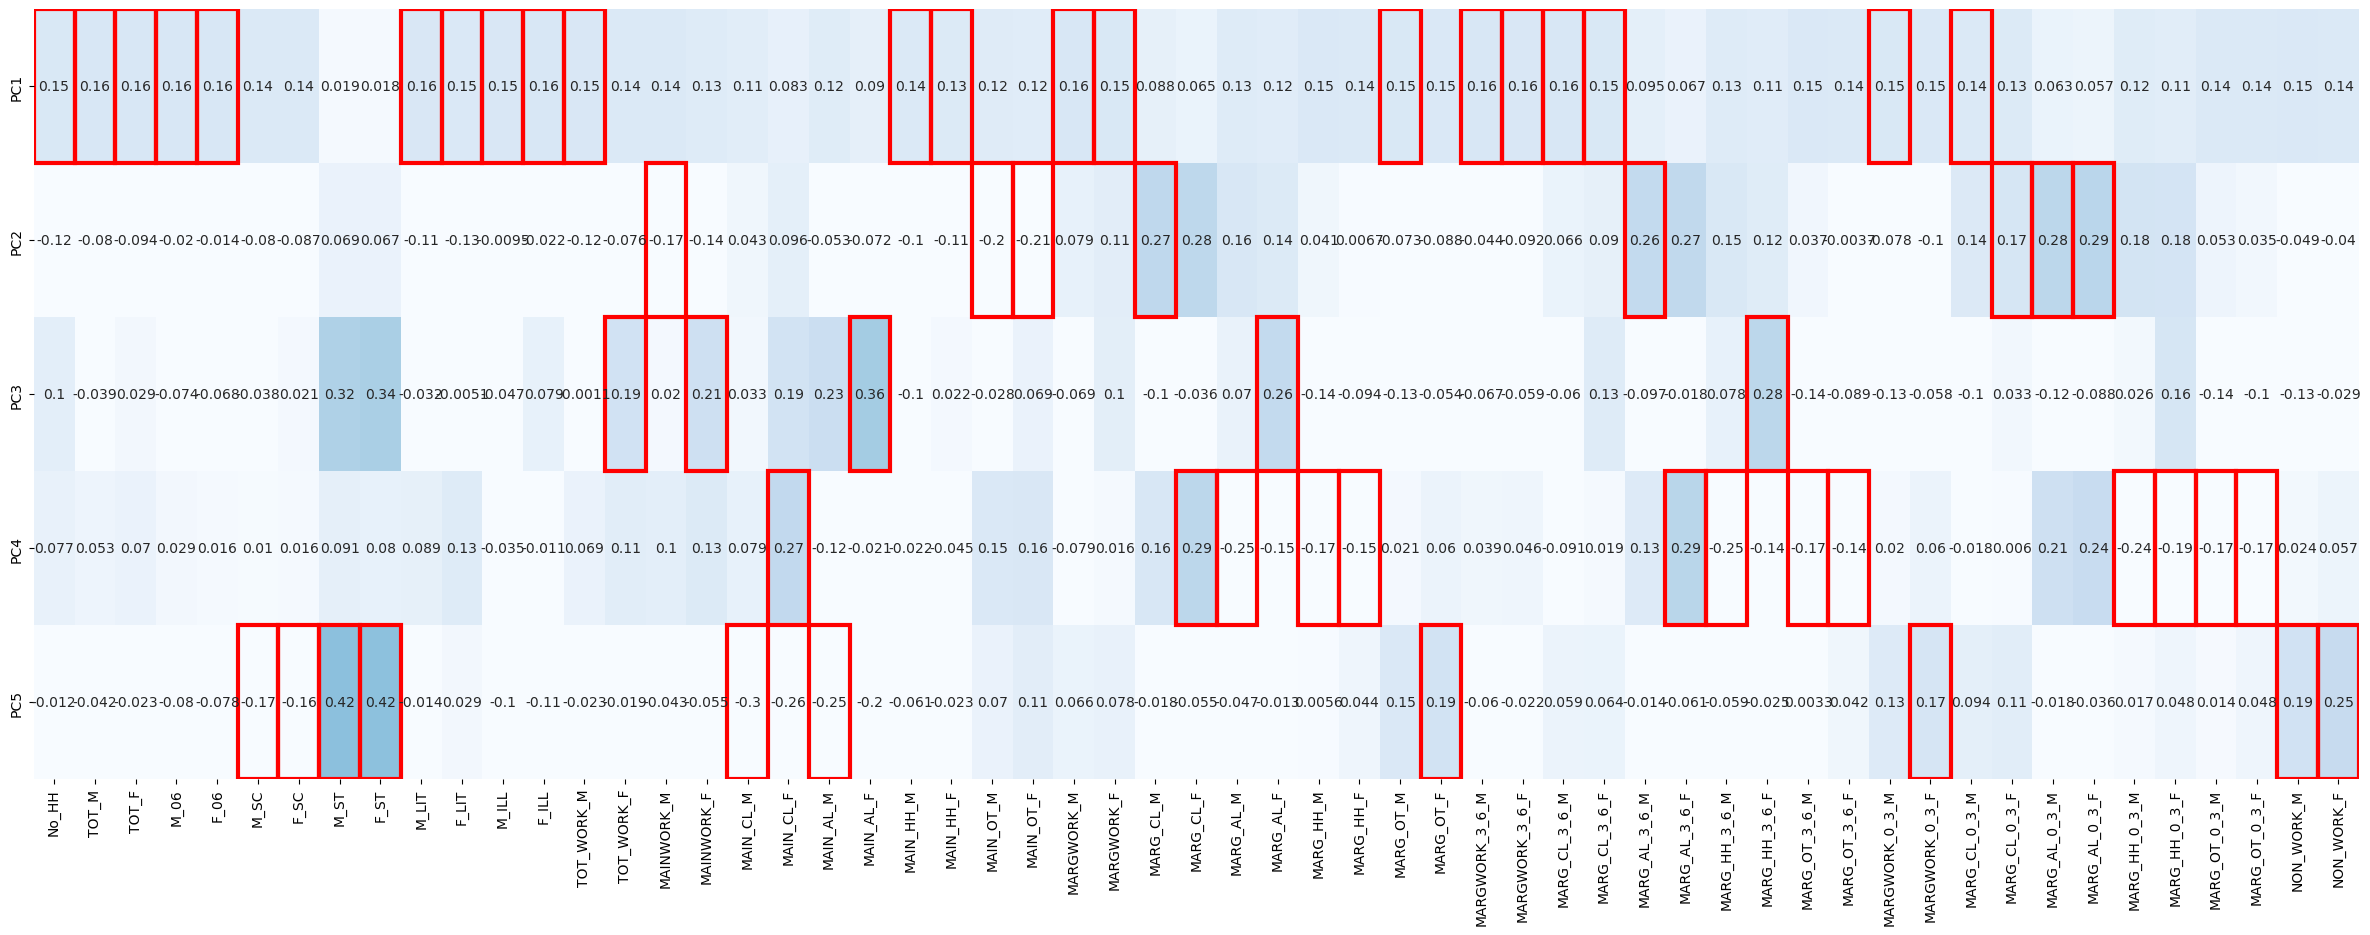

In [121]:
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(figsize=(30, 10), facecolor='w', edgecolor='k')
#see as figure, facecolor is background-white, edge colour is black

ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5'])
#create heatmap for the DF, annotate it, max variance is 1, minimum variance is 0, blue theme, no need of side bar
#Give the output as general expression, ax=ax means print next to next

column_max = df_pca_loading.abs().idxmax(axis=0)
#take absolute value of loadings, highlight the maximum by the rows(axis = 0)
#take the column, for which ever row it contributed max, highlight that value for that row

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))
#emunerate means item by item
#take the loadings, index it, get the location
#add a patch as rectangle and highlight in red colour with linewidth 3 

Inferences:

The first Principal component, PC1, is a measure of Total Males, Total Females, Males and Females under 6 years, Literate males and Females, Illiterate Males and Females, Total Working males, Male and Female Marginal Workers, Marginal Workers Male and Female of 3-6 years, Marginal Cultivator Population of 3-6 years.

The second principal component, PC2, is a measure of Marginal  Agricultural Labourers Male and Female from 0-3 years.

The third principal component, PC3, is a measure of Female Main Agricultural Labourers.

The fourth principal component, PC4, is a measure of Female Marginal Cultivation Labourers and Female Marginal Agricultural labourers from 3-6 years.

The fifth principal component, PC5, is a measure of Male and Female Scheduled Tribes.

In [122]:
df_pca.shape

(640, 5)

In [123]:
df_pca = pd.DataFrame(df_pca.round(2),columns=['pc_total_males_and_females','pc_male_female_marginal_al_0_3','pc_female_main_al','pc_female_marginal_cl_al_3_6',
                                  'pc_male_female_st'])
df_pca.head()

pc_total_males_and_females  pc_male_female_marginal_al_0_3  \
0                       -5.53                            0.43   
1                       -5.49                           -0.11   
2                       -7.47                           -0.22   
3                       -7.92                           -0.65   
4                       -5.18                            2.30   

   pc_female_main_al  pc_female_marginal_cl_al_3_6  pc_male_female_st  
0              -1.47                         -1.28               0.38  
1              -2.02                         -1.75              -0.01  
2              -0.25                          0.01               0.56  
3              -0.66                         -0.74               0.27  
4              -1.16                          1.06               1.08

In [124]:
df_new = pd.concat([df_cat, df_pca], axis=1)


In [125]:
df_new

State                     Area Name  \
0             Jammu & Kashmir                       Kupwara   
1             Jammu & Kashmir                        Badgam   
2             Jammu & Kashmir                   Leh(Ladakh)   
3             Jammu & Kashmir                        Kargil   
4             Jammu & Kashmir                         Punch   
5             Jammu & Kashmir                       Rajouri   
6             Jammu & Kashmir                        Kathua   
7             Jammu & Kashmir                      Baramula   
8             Jammu & Kashmir                     Bandipore   
9             Jammu & Kashmir                      Srinagar   
10            Jammu & Kashmir                     Ganderbal   
11            Jammu & Kashmir                       Pulwama   
12            Jammu & Kashmir                      Shupiyan   
13            Jammu & Kashmir                      Anantnag   
14            Jammu & Kashmir                        Kulgam   
15            Jammu & Kashmir                          Doda   
16            Jammu & Kashmir                        Ramban   
17            Jammu & Kashmir                      Kishtwar   
18            Jammu & Kashmir                      Udhampur   
19            Jammu & Kashmir                         Reasi   
20            Jammu & Kashmir                         Jammu   
21            Jammu & Kashmir                         Samba   
22           Himachal Pradesh                        Chamba   
23           Himachal Pradesh                        Kangra   
24           Himachal Pradesh                 Lahul & Spiti   
25           Himachal Pradesh                         Kullu   
26           Himachal Pradesh                         Mandi   
27           Himachal Pradesh                      Hamirpur   
28           Himachal Pradesh                           Una   
29           Himachal Pradesh                      Bilaspur   
30           Himachal Pradesh                         Solan   
31           Himachal Pradesh                       Sirmaur   
32           Himachal Pradesh                        Shimla   
33           Himachal Pradesh                       Kinnaur   
34                     Punjab                     Gurdaspur   
35                     Punjab                   Kapurthala    
36                     Punjab                     Jalandhar   
37                     Punjab                    Hoshiarpur   
38                     Punjab    Shahid Bhagat Singh Nagar    
39                     Punjab               Fatehgarh Sahib   
40                     Punjab                      Ludhiana   
41                     Punjab                          Moga   
42                     Punjab                      Firozpur   
43                     Punjab                       Muktsar   
44                     Punjab                      Faridkot   
45                     Punjab                      Bathinda   
46                     Punjab                         Mansa   
47                     Punjab                       Patiala   
48                     Punjab                     Amritsar    
49                     Punjab                    Tarn Taran   
50                     Punjab                      Rupnagar   
51                     Punjab    Sahibzada Ajit Singh Nagar   
52                     Punjab                       Sangrur   
53                     Punjab                       Barnala   
54                 Chandigarh                    Chandigarh   
55                Uttarakhand                    Uttarkashi   
56                Uttarakhand                       Chamoli   
57                Uttarakhand                   Rudraprayag   
58                Uttarakhand                 Tehri Garhwal   
59                Uttarakhand                      Dehradun   
60                Uttarakhand                       Garhwal   
61                Uttarakhand                   Pithoragarh   
62                Uttarakhand                     Bages

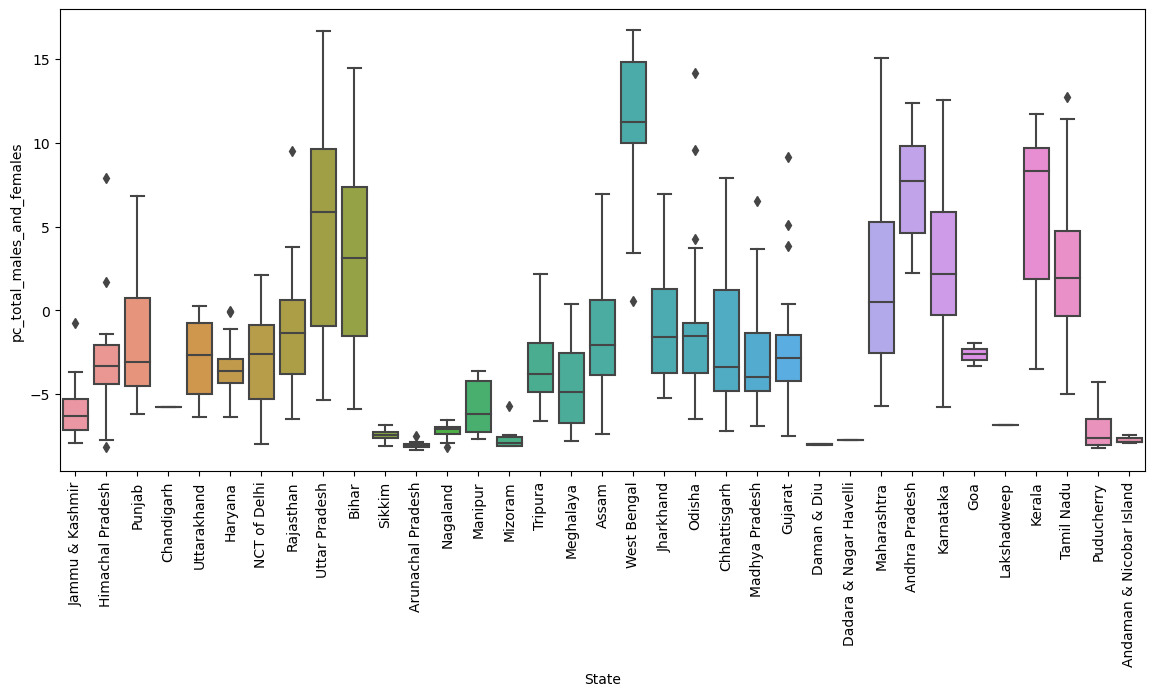

In [133]:
fig,ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='State',y='pc_total_males_and_females', data=df_new)
plt.xticks(rotation=90);

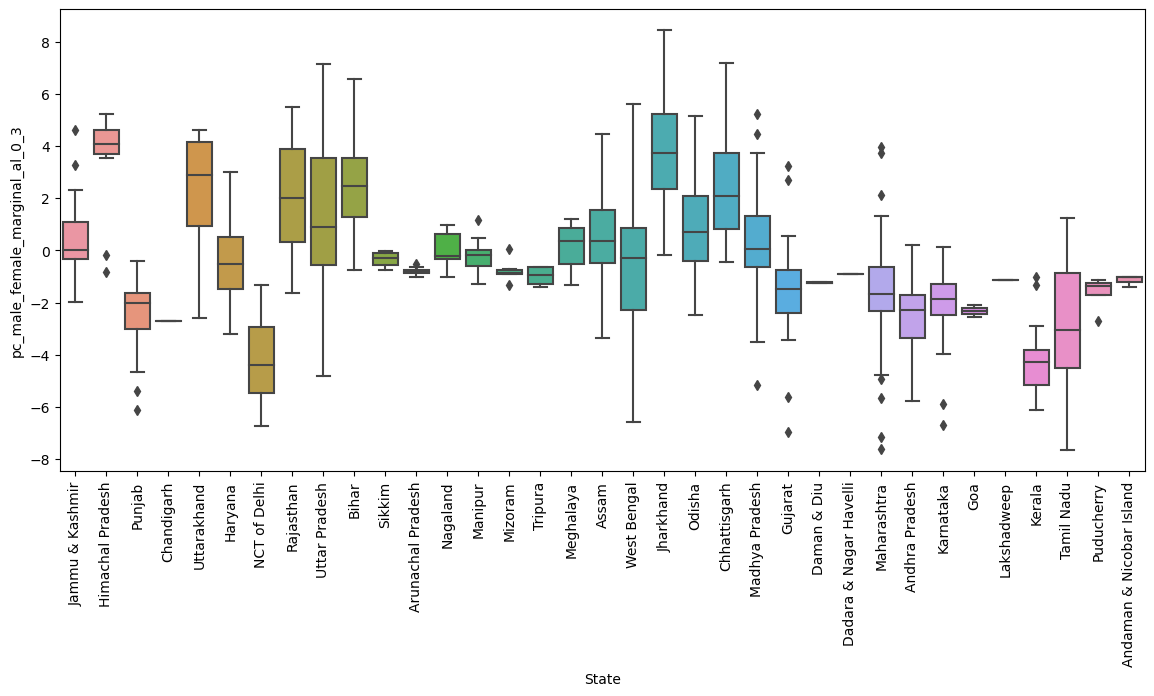

In [134]:
fig,ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='State',y='pc_male_female_marginal_al_0_3', data=df_new)
plt.xticks(rotation=90);

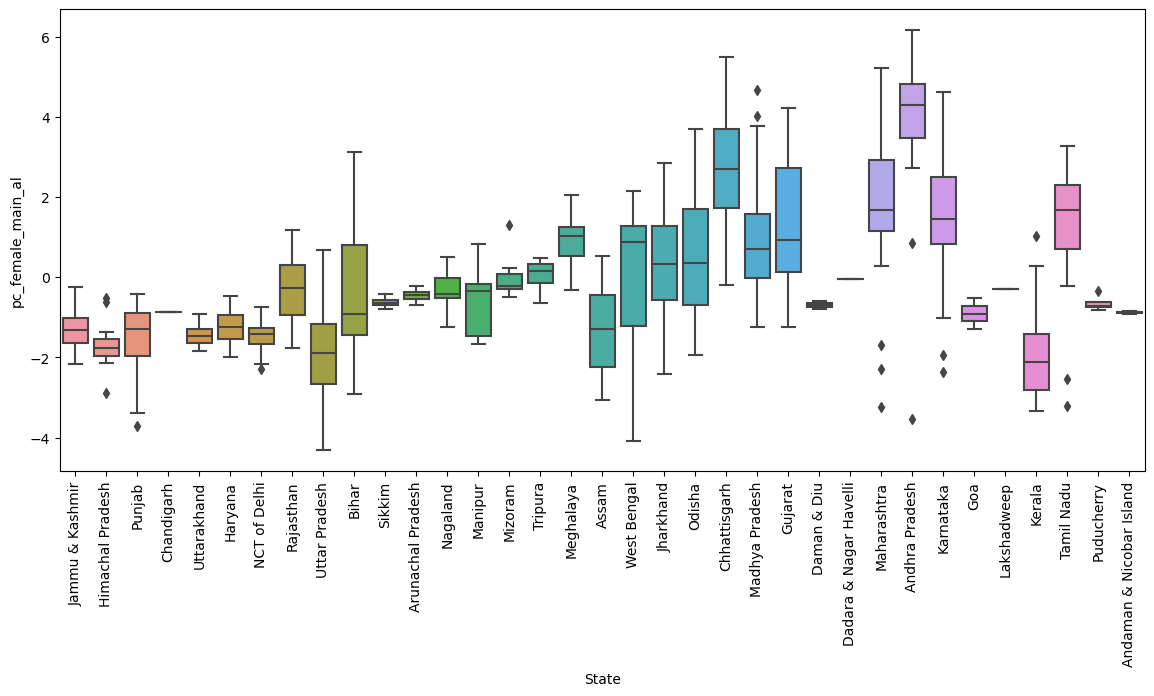

In [135]:
fig,ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='State',y='pc_female_main_al', data=df_new)
plt.xticks(rotation=90);

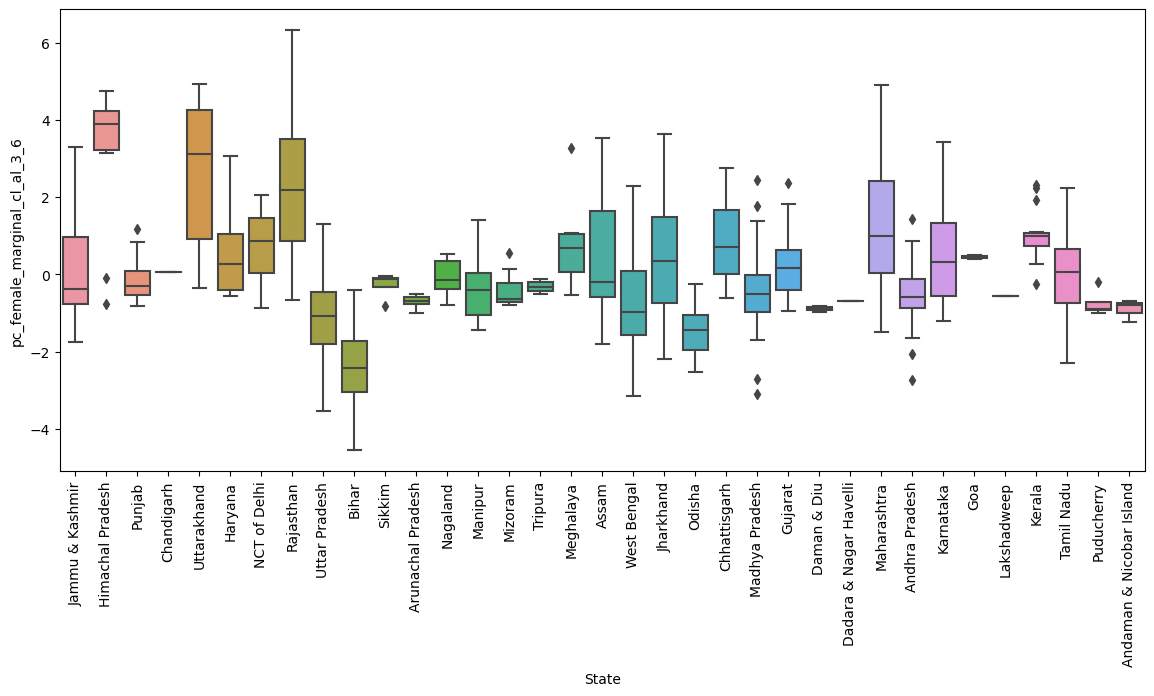

In [136]:
fig,ax = plt.subplots(figsize=(14,6))
sns.boxplot(x='State',y='pc_female_marginal_cl_al_3_6', data=df_new)
plt.xticks(rotation=90);

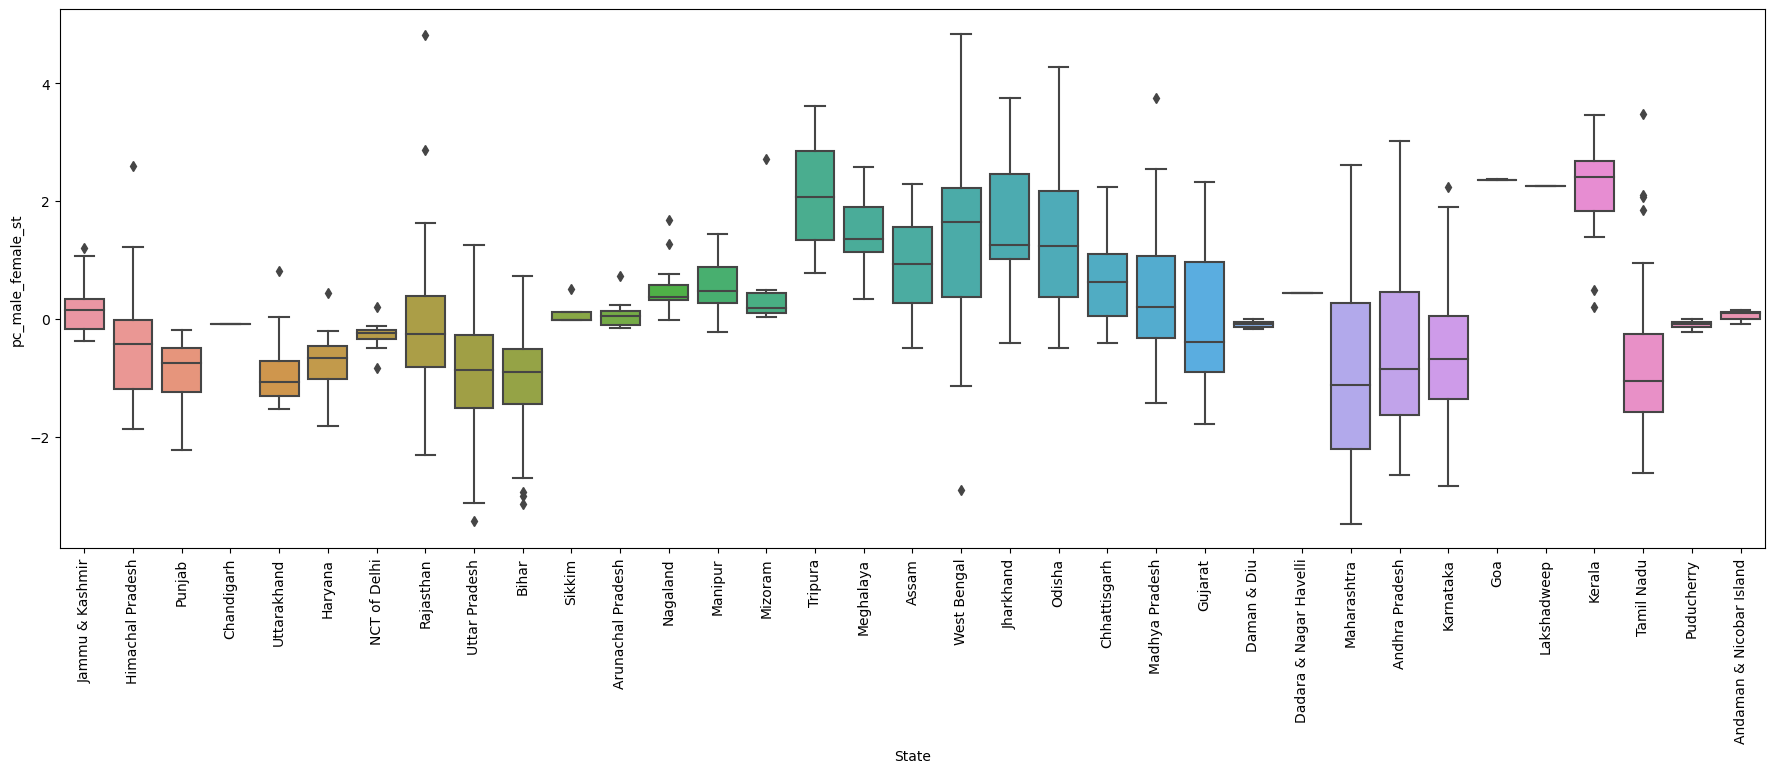

In [137]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='pc_male_female_st', data=df_new)
plt.xticks(rotation=90);

#### Inferences:
1)	Total males and females is maximum in the state of West Bengal and minimum in Arunachal Pradesh.
2)	Marginal Agricultural Labourers are the maximum in Jharkhand while the least in NCT of Delhi.
3)	Main Female Agricultural Labourers are the least in Kerala and the highest in Andhra Pradesh.
4)	Female Marginal Cultivator and Agricultural Labourers from 3-6 years is maximum in Uttarakhand and Himachal Pradesh and the least in Bihar.
5)	Male and Female Scheduled Tribes are maximum in Tripura and the lowest in Maharashtra.
